# **New York City Yellow Taxi EDA By Rohan Babaria C76**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [9]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [15]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import os
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Select the folder having data files
os.chdir(r'C:\Users\Lenovo\OneDrive\Desktop\UpGrad DSAI Course\NYC EDA Assignment\Data v3\Datasets and Dictionary v3\Datasets and Dictionary v3\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialise empty dataframes
df = pd.DataFrame()
sampled_df = pd.DataFrame()  # Initialize sampled_df

# Define data_dir variable
data_dir = r'C:\Users\Lenovo\OneDrive\Desktop\UpGrad DSAI Course\NYC EDA Assignment\Data v3\Datasets and Dictionary v3\Datasets and Dictionary v3'

# Sampling 5% from each hourly data in each file
for file_path in file_list:
    try:
        # Read parquet file
        df = pd.read_parquet(file_path)
        df.columns = df.columns.str.lower()
        
        # Inspect columns to confirm pickup_datetime exists
        print(f"Columns in {file_path}: {df.columns.tolist()}")
        print(df.head(5))  # Display first few rows

        if 'tpep_pickup_datetime' in df.columns:
            for date in df['tpep_pickup_datetime'].dt.date.unique():
                daily_data = df[df['tpep_pickup_datetime'].dt.date == date]
                for hour in range(24):
                    hourly_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]
                    sampled_data = hourly_data.sample(frac=0.05, random_state=42)
                    sampled_df = pd.concat([sampled_df, sampled_data])
        else:
            print(f"'tpep_pickup_datetime' not found in {file_path}")

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Check sampled data size
print(f"Sampled DataFrame Shape: {sampled_df.shape}")

# Save sampled data if not empty
if not sampled_df.empty:
    sampled_df.reset_index(drop=True, inplace=True)
    sampled_df.to_parquet("sampled_data.parquet")
    print("Sampled data saved successfully.")
else:
    print("No data sampled.")

# Display sample
sampled_df.head()

Columns in 2023-1.parquet: ['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
   vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0         

KeyboardInterrupt: 

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
os.chdir(r'C:\Users\Lenovo\OneDrive\Desktop\UpGrad DSAI Course\NYC EDA Assignment\Data v3\Datasets and Dictionary v3\Datasets and Dictionary v3\trip_records')

# List all monthly files
file_list = os.listdir()

# List to hold monthly samples
sampled_all_months = []

for file_name in file_list:
    try:
        # Full path
        file_path = os.path.join(os.getcwd(), file_name)

        # Load data
        monthly_data = pd.read_parquet(file_path)

        # Ensure datetime columns are parsed
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # Group by (date, hour) and sample
        sampled_groups = (
            monthly_data
            .groupby(['pickup_date', 'pickup_hour'], group_keys=False)
            .apply(lambda x: x.sample(frac=0.05, random_state=42) if len(x) > 0 else pd.DataFrame())
        )

        # Add to master list
        sampled_all_months.append(sampled_groups)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Final combined DataFrame
df = pd.concat(sampled_all_months, ignore_index=True)

In [ ]:
df.head()

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Set directory path
os.chdir(r'C:\Users\Lenovo\OneDrive\Desktop\UpGrad DSAI Course\NYC EDA Assignment\Data\Datasets and Dictionary\trip_records')

# List all files in the directory
file_list = os.listdir()
print("Files in Directory:", file_list)  # Check files

# Initialize an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files
for file_name in file_list:
    try:
        # Get the full file path
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the file based on its extension
        if file_path.endswith('.parquet'):
            monthly_data = pd.read_parquet(file_path)
        else:
            monthly_data = pd.read_csv(file_path, parse_dates=["pickup_datetime"])

        # Select the correct datetime column
        datetime_column = "tpep_pickup_datetime" if "tpep_pickup_datetime" in monthly_data.columns else "pickup_datetime"
        print(f"Processing {file_name} using column {datetime_column}")  # Confirm column

        # Convert to datetime
        monthly_data[datetime_column] = pd.to_datetime(monthly_data[datetime_column])
        print(f"{file_name} loaded with shape: {monthly_data.shape}")  # Confirm data loaded

        # DataFrame to store sampled data
        sampled_data = pd.DataFrame()

        # Loop through each date
        for date in monthly_data[datetime_column].dt.date.unique():
            # Filter data for the current date
            date_data = monthly_data[monthly_data[datetime_column].dt.date == date]

            # Loop through each hour
            for hour in range(24):
                # Filter data for the current hour
                hourly_data = date_data[date_data[datetime_column].dt.hour == hour]
                print(f"Hour {hour} data size: {hourly_data.shape}")  # Confirm hourly data

                # Sample 5% of hourly data
                if not hourly_data.empty:
                    sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hourly_data])

        # Append to the final dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print("Final DataFrame shape:", df.shape)
print(df.head())

In [ ]:
print(df.sample(10))

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
# Save sampled data to a CSV file at the specified location

In [ ]:
target_size = 275_000 

# Check current size
print(f"Original combined data shape: {df.shape}")

if len(df) > target_size:
    df = df.sample(n=target_size, random_state=42).reset_index(drop=True)
    print(f"Downsampled to: {df.shape}")
else:
    print("No downsampling needed.")

# Save to Parquet
df.to_parquet("nyc_taxi_sampled_2023_final.parquet", index=False)
df.to_csv("nyc_taxi_sampled_2023_final.csv", index=False)

print("Final dataset saved as parquet and csv")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [66]:
# Load the new data file
df = pd.read_csv("nyc_taxi_sampled_2023_final.csv")
pd.set_option('display.max_rows', None)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2023-08-24 23:43:17   2023-08-24 23:49:13              1.0   
1       2.0  2023-06-15 22:51:35   2023-06-15 23:00:48              1.0   
2       2.0  2023-03-14 10:27:39   2023-03-14 11:12:25              NaN   
3       2.0  2023-01-20 10:06:26   2023-01-20 10:06:40              1.0   
4       2.0  2023-05-12 19:32:51   2023-05-12 19:58:58              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.79         1.0                  N         211.0         148.0   
1           0.78         1.0                  N         230.0         186.0   
2          16.19         NaN                NaN         137.0         132.0   
3           0.00         1.0                  N         193.0         193.0   
4           6.84         1.0                  N         141.0         256.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.2    1.0      0.5        2.44          0.00   
1             1          9.3    1.0      0.5        2.86          0.00   
2             0         77.0    0.0      0.5       17.51          6.55   
3             1          3.0    0.0      0.5        0.00          0.00   
4             1         32.4    2.5      0.5        7.78          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.64                   2.5          NaN   
1                    1.0         17.16                   2.5          NaN   
2                    1.0        105.06                   NaN          NaN   
3                    1.0          4.50                   0.0          0.0   
4                    1.0         46.68                   2.5          NaN   

  pickup_date  pickup_hour  Airport_fee  vendorid  ratecodeid  pulocationid  \
0  2023-08-24           23          0.0       NaN         NaN           NaN   
1  2023-06-15           22          0.0       NaN         NaN           NaN   
2  2023-03-14           10          NaN       NaN         NaN           NaN   
3  2023-01-20           10          NaN       NaN         NaN           NaN   
4  2023-05-12           19          0.0       NaN         NaN           NaN   

   dolocationid  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275000 entries, 0 to 274999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               261893 non-null  float64
 1   tpep_pickup_datetime   275000 non-null  object 
 2   tpep_dropoff_datetime  275000 non-null  object 
 3   passenger_count        265663 non-null  float64
 4   trip_distance          275000 non-null  float64
 5   RatecodeID             253020 non-null  float64
 6   store_and_fwd_flag     265663 non-null  object 
 7   PULocationID           261893 non-null  float64
 8   DOLocationID           261893 non-null  float64
 9   payment_type           275000 non-null  int64  
 10  fare_amount            275000 non-null  float64
 11  extra                  275000 non-null  float64
 12  mta_tax                275000 non-null  float64
 13  tip_amount             275000 non-null  float64
 14  tolls_amount           275000 non-nu

In [69]:
print(df.shape)

(275000, 26)


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [72]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2023-08-24 23:43:17   2023-08-24 23:49:13              1.0   
1       2.0  2023-06-15 22:51:35   2023-06-15 23:00:48              1.0   
2       2.0  2023-03-14 10:27:39   2023-03-14 11:12:25              NaN   
3       2.0  2023-01-20 10:06:26   2023-01-20 10:06:40              1.0   
4       2.0  2023-05-12 19:32:51   2023-05-12 19:58:58              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.79         1.0                  N         211.0         148.0   
1           0.78         1.0                  N         230.0         186.0   
2          16.19         NaN                NaN         137.0         132.0   
3           0.00         1.0                  N         193.0         193.0   
4           6.84         1.0                  N         141.0         256.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.2    1.0      0.5        2.44          0.00   
1             1          9.3    1.0      0.5        2.86          0.00   
2             0         77.0    0.0      0.5       17.51          6.55   
3             1          3.0    0.0      0.5        0.00          0.00   
4             1         32.4    2.5      0.5        7.78          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.64                   2.5          NaN   
1                    1.0         17.16                   2.5          NaN   
2                    1.0        105.06                   NaN          NaN   
3                    1.0          4.50                   0.0          0.0   
4                    1.0         46.68                   2.5          NaN   

  pickup_date  pickup_hour  Airport_fee  vendorid  ratecodeid  pulocationid  \
0  2023-08-24           23          0.0       NaN         NaN           NaN   
1  2023-06-15           22          0.0       NaN         NaN           NaN   
2  2023-03-14           10          NaN       NaN         NaN           NaN   
3  2023-01-20           10          NaN       NaN         NaN           NaN   
4  2023-05-12           19          0.0       NaN         NaN           NaN   

   dolocationid  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [74]:
duplicate_columns = ['VendorID', 'vendorid', 'RatecodeID', 'ratecodeid',
                     'PULocationID', 'pulocationid', 'DOLocationID', 'dolocationid',
                     'Airport_fee', 'airport_fee']

df[duplicate_columns].isna().sum()

VendorID         13107
vendorid        261893
RatecodeID       21980
ratecodeid      262357
PULocationID     13107
pulocationid    261893
DOLocationID     13107
dolocationid    261893
Airport_fee      42375
airport_fee     241962
dtype: int64

In [75]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df.drop(columns=['airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [77]:
# check where values of fare amount are negative
neg_fares = df[df['fare_amount'] < 0]
print(f"Rows with negative amounts: {len(neg_fares)}")

Rows with negative amounts: 0


Did you notice something different in the `RatecodeID` column for above records?

In [79]:
# Analyse RatecodeID for the negative fare amounts
neg_fares['RatecodeID'].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [80]:
# Find which columns have negative values
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

neg_columns = {}

for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        neg_columns[col] = neg_count

print("Columns with negative values:")
for col, count in neg_columns.items():
    print(f"{col}: {count}")

Columns with negative values:
mta_tax: 18
improvement_surcharge: 18
total_amount: 18
congestion_surcharge: 14
Airport_fee: 5


In [81]:
# fix these negative values
for col in neg_columns: 
    neg_count = (df[col] < 0).sum()
    df.loc[df[col] < 0, col] = 0
    print(f"Replaced {neg_count} negative values in '{col}' with 0.")

Replaced 18 negative values in 'mta_tax' with 0.
Replaced 18 negative values in 'improvement_surcharge' with 0.
Replaced 18 negative values in 'total_amount' with 0.
Replaced 14 negative values in 'congestion_surcharge' with 0.
Replaced 5 negative values in 'Airport_fee' with 0.


In [82]:
(df[list(neg_columns.keys())] < 0).sum()

mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [85]:
# Find the proportion of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent)

ratecodeid               95.402545
dolocationid             95.233818
pulocationid             95.233818
vendorid                 95.233818
RatecodeID                7.992727
PULocationID              4.766182
DOLocationID              4.766182
VendorID                  4.766182
store_and_fwd_flag        3.395273
congestion_surcharge      3.395273
passenger_count           3.395273
Airport_fee               3.395273
tpep_dropoff_datetime     0.000000
trip_distance             0.000000
pickup_hour               0.000000
pickup_date               0.000000
total_amount              0.000000
payment_type              0.000000
improvement_surcharge     0.000000
tolls_amount              0.000000
tip_amount                0.000000
tpep_pickup_datetime      0.000000
extra                     0.000000
fare_amount               0.000000
mta_tax                   0.000000
dtype: float64


In [86]:
# Defining pairs by less complete column to more complete column
column_pairs = {
    'ratecodeid': 'RatecodeID',
    'pulocationid': 'PULocationID',
    'dolocationid': 'DOLocationID',
    'vendorid': 'VendorID'
}

# Merging missing values from high missing columns to low missing columns and dropping them
for low_col, high_col in column_pairs.items():
    df[high_col] = df[high_col].fillna(df[low_col])
    df.drop(columns=[low_col], inplace=True)
    print(f"Merged '{low_col}' into '{high_col}' and dropped '{low_col}'")

Merged 'ratecodeid' into 'RatecodeID' and dropped 'ratecodeid'
Merged 'pulocationid' into 'PULocationID' and dropped 'pulocationid'
Merged 'dolocationid' into 'DOLocationID' and dropped 'dolocationid'
Merged 'vendorid' into 'VendorID' and dropped 'vendorid'


In [87]:
# Find the proportion of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent)

Airport_fee              3.395273
passenger_count          3.395273
RatecodeID               3.395273
store_and_fwd_flag       3.395273
congestion_surcharge     3.395273
mta_tax                  0.000000
pickup_hour              0.000000
pickup_date              0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
VendorID                 0.000000
extra                    0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
fare_amount              0.000000
dtype: float64


**2.2.2**  <font><font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

Did you find zeroes in passenger_count? Handle these.

In [90]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
mode_passenger = df['passenger_count'].mode()[0]

df['passenger_count'].fillna(mode_passenger, inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [92]:
# Fix missing values in 'RatecodeID'
# Show rows where RatecodeID is missing
df[df['RatecodeID'].isnull()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2.0  2023-03-14 10:27:39   2023-03-14 11:12:25              1.0   
5         1.0  2023-05-17 17:33:15   2023-05-17 17:46:39              1.0   
97        1.0  2023-11-29 23:47:04   2023-11-30 00:03:05              1.0   
197       2.0  2023-03-02 20:53:50   2023-03-02 21:07:13              1.0   
205       1.0  2023-10-08 06:15:13   2023-10-08 06:28:50              1.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2            16.19         NaN                NaN         137.0         132.0   
5             2.00         NaN                NaN         239.0         237.0   
97            0.00         NaN                NaN         158.0          87.0   
197           1.87         NaN                NaN         234.0         114.0   
205           0.00         NaN                NaN         262.0          88.0   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2               0        77.00    0.0      0.5       17.51          6.55   
5               0        14.20    2.5      0.5        4.14          0.00   
97              0        16.31    0.0      0.5        0.00          0.00   
197             0        13.21    0.0      0.5        2.58          0.00   
205             0        23.35    0.0      0.5        0.00          0.00   

     improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
2                      1.0        105.06                   NaN  2023-03-14   
5                      1.0         24.84                   NaN  2023-05-17   
97                     1.0         20.31                   NaN  2023-11-29   
197                    1.0         19.79                   NaN  2023-03-02   
205                    1.0         27.35                   NaN  2023-10-08   

     pickup_hour  Airport_fee  
2             10          NaN  
5             17          NaN  
97            23          NaN  
197           20          NaN  
205            6          NaN

In [93]:
mode_values = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_values, inplace=True)

In [94]:
# Find the proportion of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent)

Airport_fee              3.395273
congestion_surcharge     3.395273
store_and_fwd_flag       3.395273
extra                    0.000000
pickup_hour              0.000000
pickup_date              0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
RatecodeID               0.000000
trip_distance            0.000000
passenger_count          0.000000
tpep_dropoff_datetime    0.000000
fare_amount              0.000000
dtype: float64


In [95]:
mode_flag = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'].fillna(mode_flag, inplace=True)

print(f"Filled missing 'store_and_fwd_flag' with mode: {mode_flag}")

Filled missing 'store_and_fwd_flag' with mode: N


In [96]:
df['Airport_fee'].fillna(0, inplace=True)
print("Filled missing 'Airport_fee' with 0 (assumed non-airport trips)")

Filled missing 'Airport_fee' with 0 (assumed non-airport trips)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [98]:
df['congestion_surcharge'].value_counts(dropna=False).sort_index()

congestion_surcharge
0.0     20301
2.5    245362
NaN      9337
Name: count, dtype: int64

In [99]:
# handle null values in congestion_surcharge
mode_cs = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(mode_cs, inplace=True)

print(f"Filled missing 'store_and_fwd_flag' with mode: {mode_cs}")

Filled missing 'store_and_fwd_flag' with mode: 2.5


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [101]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent)

VendorID                 0.0
extra                    0.0
pickup_hour              0.0
pickup_date              0.0
congestion_surcharge     0.0
total_amount             0.0
improvement_surcharge    0.0
tolls_amount             0.0
tip_amount               0.0
mta_tax                  0.0
fare_amount              0.0
tpep_pickup_datetime     0.0
payment_type             0.0
DOLocationID             0.0
PULocationID             0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
trip_distance            0.0
passenger_count          0.0
tpep_dropoff_datetime    0.0
Airport_fee              0.0
dtype: float64


In [102]:
# Data is clean of missing values and is ready to be examined further

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [105]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  275000.00000    275000.000000  275000.000000  275000.000000   
mean        1.73316         1.353771       3.686730       1.612233   
std         0.44827         0.876876      74.463116       7.263488   
min         1.00000         0.000000       0.000000       1.000000   
25%         1.00000         1.000000       1.050000       1.000000   
50%         2.00000         1.000000       1.800000       1.000000   
75%         2.00000         1.000000       3.400000       1.000000   
max         6.00000         8.000000   34804.510000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  275000.000000  275000.000000  275000.000000  275000.000000   
mean      165.280029     164.045498       1.164393      19.804700   
std        64.011128      69.803349       0.507552      18.130024   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     601.500000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  275000.000000  275000.000000  275000.000000  275000.000000   
mean        1.587731       0.495334       3.539006       0.596340   
std         1.830103       0.048717       4.065227       2.179169   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.830000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        11.750000       4.000000     200.000000      77.750000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          275000.000000  275000.000000         275000.000000   
mean                0.998994      28.859838              2.315445   
std                 0.029314      22.692191              0.653703   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.840000              2.500000   
max                 1.000000     643.000000              2.500000   

         pickup_hour    Airport_fee  
count  275000.000000  275000.000000  
mean       14.253375       0.137989  
std         5.815294       0.457624  
min         0.000000       0.000000  
25%        11.000000       0.000000  
50%        15.000000       0.000000  
75%        19.000000       0.000000  
max        23.000000       1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [109]:
# remove passenger_count > 6
condition = df['passenger_count'] > 6
print(f"Dropping {condition.sum()} rows: passenger_count > 6.")
df = df[df['passenger_count'] <= 6]

Dropping 3 rows: passenger_count > 6.


In [110]:
# removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
condition = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
print(f"Dropping {condition.sum()} rows: distance/fare zero but locations different.")
df = df[~condition]

Dropping 14 rows: distance/fare zero but locations different.


In [111]:
# removing trips longer than 250 miles
condition = df['trip_distance'] > 250
print(f"Dropping {condition.sum()} rows: trip_distance > 250 miles.")
df = df[~condition]

Dropping 6 rows: trip_distance > 250 miles.


In [112]:
#removing trips with payment_type == 0
condition = df['payment_type'] == 0
print(f"Dropping {condition.sum()} rows: invalid payment_type = 0.")
df = df[~condition]

Dropping 9334 rows: invalid payment_type = 0.


In [113]:
#removing trips where trip_distance is nearly 0 and fare_amount is more than 300
condition = (df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)
print(f"Dropping {condition.sum()} rows: trip_distance < 0.1 and fare_amount > 300.")
df = df[~condition]

Dropping 5 rows: trip_distance < 0.1 and fare_amount > 300.


In [114]:
# Dropping columns where dropoff time is earlier than pickup time
# Ensuring both columns are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#creating function to remove invalid dates
invalid_time = df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']
print(f"Dropping {invalid_time.sum()} rows: dropoff time earlier than pickup time.")
df = df[~invalid_time]

Dropping 11 rows: dropoff time earlier than pickup time.


In [115]:
# Do any columns need standardising?
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2023-08-24 23:43:17   2023-08-24 23:49:13              1.0   
1       2.0  2023-06-15 22:51:35   2023-06-15 23:00:48              1.0   
3       2.0  2023-01-20 10:06:26   2023-01-20 10:06:40              1.0   
4       2.0  2023-05-12 19:32:51   2023-05-12 19:58:58              2.0   
6       2.0  2023-06-03 19:23:55   2023-06-03 19:37:14              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.79         1.0                  N         211.0         148.0   
1           0.78         1.0                  N         230.0         186.0   
3           0.00         1.0                  N         193.0         193.0   
4           6.84         1.0                  N         141.0         256.0   
6           1.60         1.0                  N         161.0         140.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.2    1.0      0.5        2.44           0.0   
1             1          9.3    1.0      0.5        2.86           0.0   
3             1          3.0    0.0      0.5        0.00           0.0   
4             1         32.4    2.5      0.5        7.78           0.0   
6             1         12.8    0.0      0.5        3.36           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         14.64                   2.5  2023-08-24   
1                    1.0         17.16                   2.5  2023-06-15   
3                    1.0          4.50                   0.0  2023-01-20   
4                    1.0         46.68                   2.5  2023-05-12   
6                    1.0         20.16                   2.5  2023-06-03   

   pickup_hour  Airport_fee  
0           23          0.0  
1           22          0.0  
3           10          0.0  
4           19          0.0  
6           19          0.0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [117]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

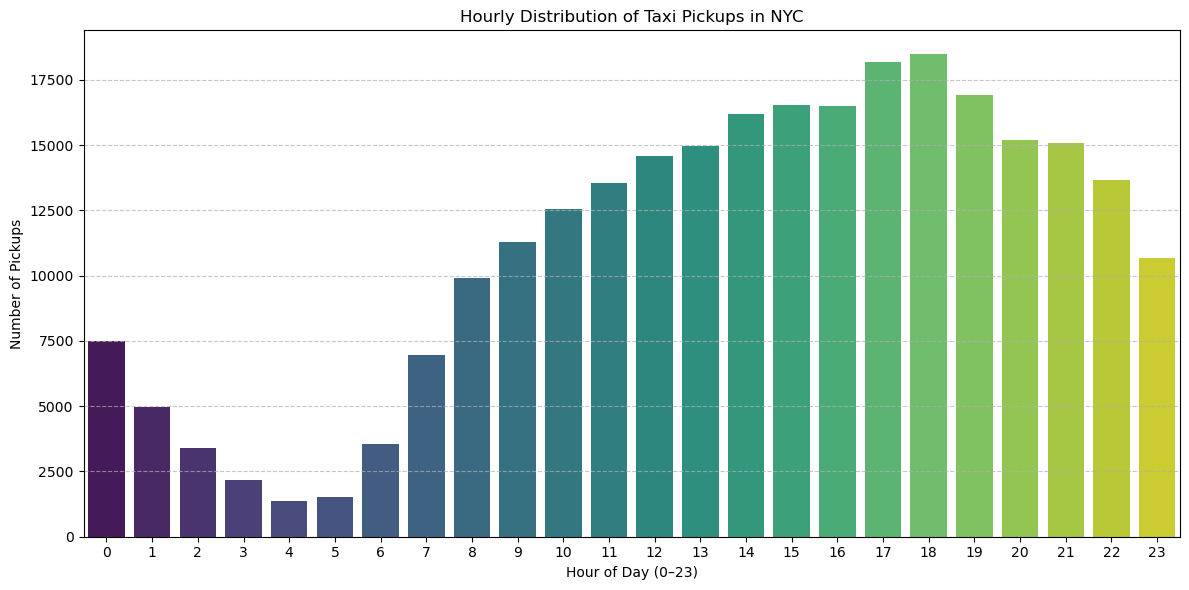

In [122]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count number of pickups for each hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")
plt.title("Hourly Distribution of Taxi Pickups in NYC")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

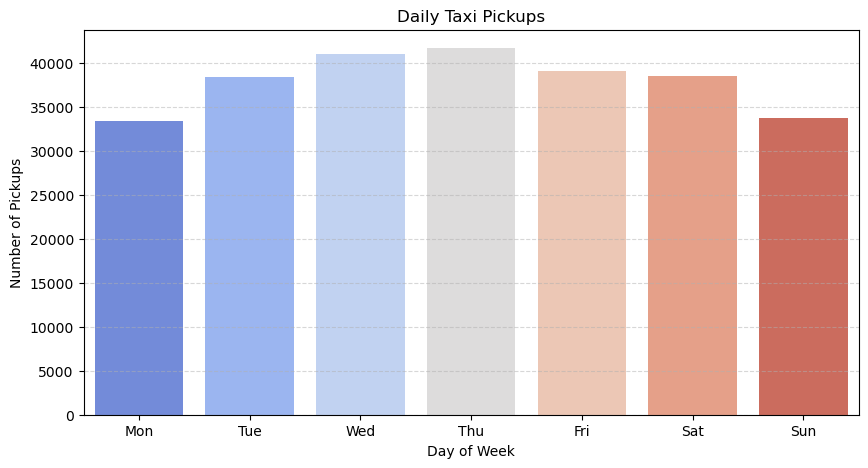

In [123]:
# Find and show the daily trends in taxi pickups (days of the week)
# Ensuring correct format (Monday=0, Sunday=6)
df['pickup_dayofweek'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek  
days_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['pickup_dayofweek'] = df['pickup_dayofweek'].map(days_map)

daily_counts = df['pickup_dayofweek'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="coolwarm")
plt.title("Daily Taxi Pickups")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

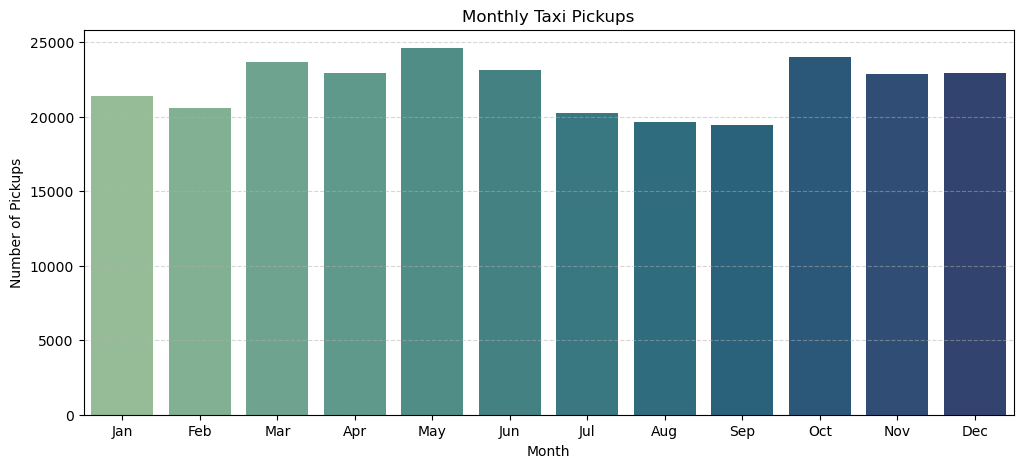

In [124]:
# Show the monthly trends in pickups
# Extracting months from pickup_date
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
months_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['pickup_month'] = df['pickup_month'].map(months_map)

monthly_counts = df['pickup_month'].value_counts().reindex(list(months_map.values()))

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="crest")
plt.title("Monthly Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [127]:
# Analyse the above parameters
# Columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Creating a DataFrame to hold zero and negative counts
zero_negative_counts = {}

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    zero_negative_counts[col] = {
        'Zero Values': zero_count,
        'Negative Values': negative_count
    }

# Convert to DataFrame for better display
result_df = pd.DataFrame(zero_negative_counts).T
print(result_df)

               Zero Values  Negative Values
fare_amount             89                0
tip_amount           59583                0
total_amount            50                0
trip_distance         3238                0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [130]:
# Create a df with non zero entries for the selected parameters.
# Filter out rows where any key metric is 0 or less while keeping 0 distance only if pickup and dropoff are the same location
filtered_df = df[
    ((df['trip_distance'] > 0) | (df['PULocationID'] == df['DOLocationID'])) &
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0)
].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [132]:
# Group data by month and analyse monthly revenue

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
# Group by month and calculate total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
# Rename columns for clarity
monthly_revenue.columns = ['Month', 'Total_Revenue']

monthly_revenue = monthly_revenue.sort_values(by='Month')
print(monthly_revenue)

    Month  Total_Revenue
0       1      583111.49
1       2      559538.30
2       3      671628.54
3       4      663980.95
4       5      720830.75
5       6      672061.75
6       7      588028.30
7       8      574349.95
8       9      576565.95
9      10      714099.95
10     11      662827.28
11     12      668257.35


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [134]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum revenue
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate total revenue
total_revenue = quarterly_revenue['total_amount'].sum()

# Calculate proportion
quarterly_revenue['revenue_proportion'] = (quarterly_revenue['total_amount'] / total_revenue).round(4)

# Rename columns for clarity
quarterly_revenue.columns = ['Quarter', 'Total_Revenue', 'Proportion_of_Total']

print(quarterly_revenue)

  Quarter  Total_Revenue  Proportion_of_Total
0  2023Q1     1814278.33               0.2370
1  2023Q2     2056873.45               0.2687
2  2023Q3     1738944.20               0.2272
3  2023Q4     2045184.58               0.2672


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.95


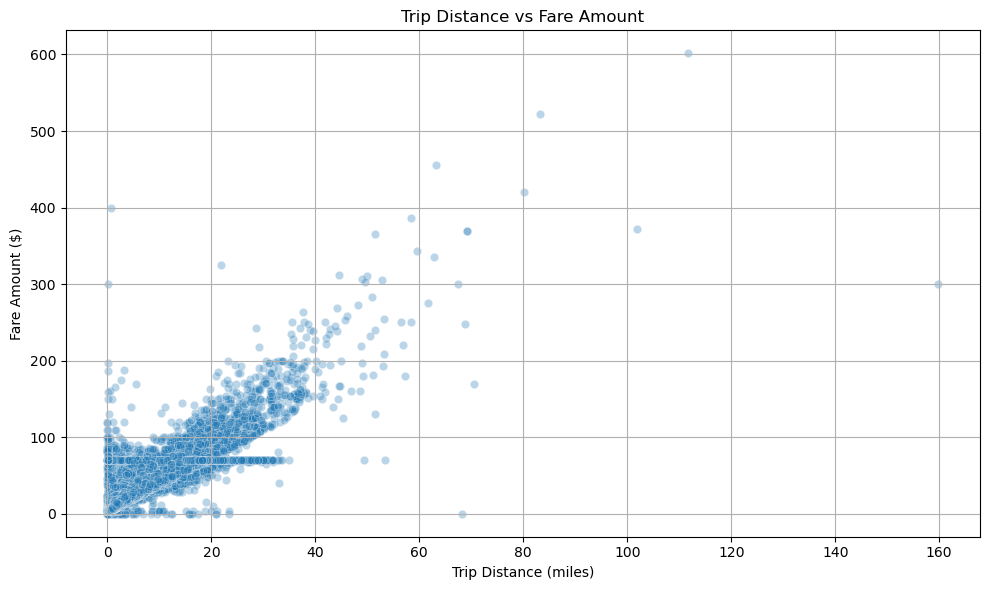

In [136]:
# Filter out trips with zero distance
df_filtered = df[df['trip_distance'] > 0]

# Calculating correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

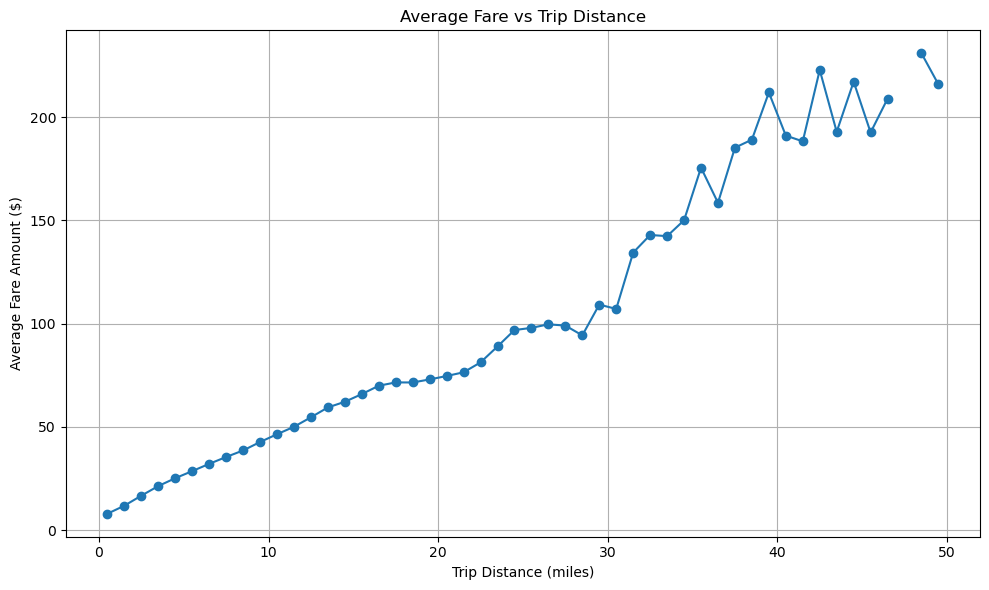

In [137]:
# Show how trip fare is affected by distance
# Filter out rows with 0 distance for valid distances
df_filtered = df[df['trip_distance'] > 0]

# Creating distance bins
df_filtered['distance_bin'] = pd.cut(df_filtered['trip_distance'], bins=range(0, 51))

# Group by distance bin and calculate average fare
bin_avg_fare = df_filtered.groupby('distance_bin')['fare_amount'].mean().reset_index()

# Convert bin labels to midpoints for plotting
bin_avg_fare['distance_mid'] = bin_avg_fare['distance_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 6))
plt.plot(bin_avg_fare['distance_mid'], bin_avg_fare['fare_amount'], marker='o', linestyle='-')
plt.title('Average Fare vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.251


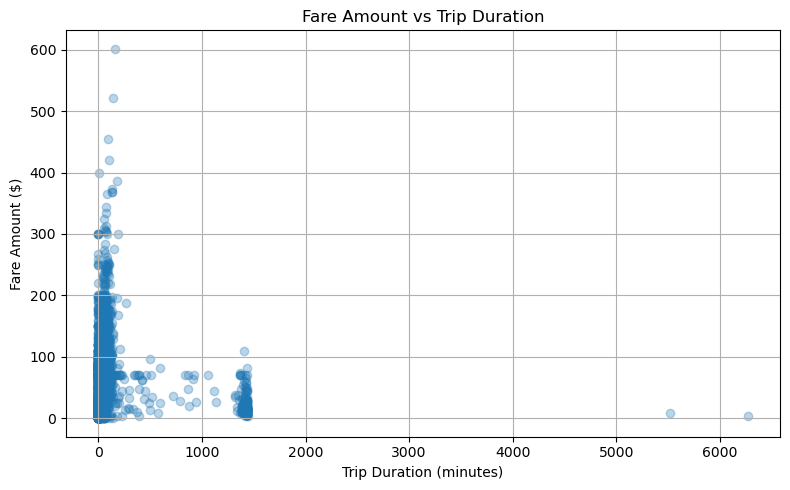

In [139]:
# Show relationship between fare_amount and trip duration
# Ensure datetime conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out zero or negative durations
valid_df = df[df['trip_duration'] > 0]

# Correlation
corr1 = valid_df['fare_amount'].corr(valid_df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {corr1:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(valid_df['trip_duration'], valid_df['fare_amount'], alpha=0.3)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Trip Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between fare_amount and passenger_count: 0.045


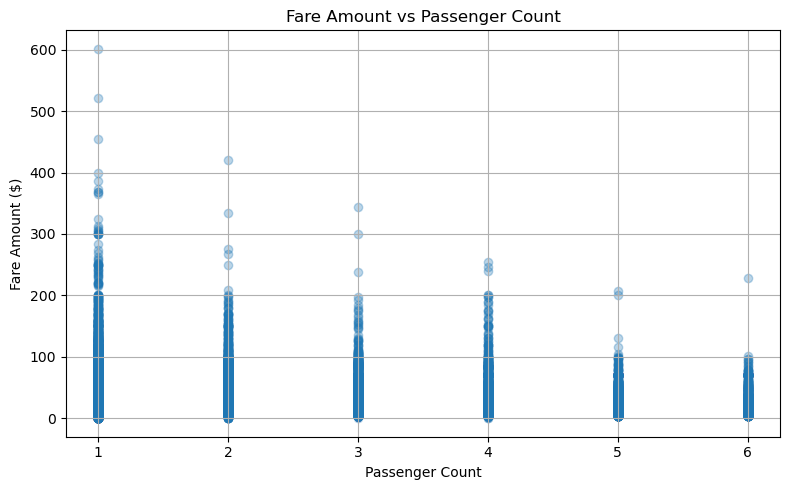

In [140]:
# Show relationship between fare and number of passengers
valid_pass = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Correlation
corr2 = valid_pass['fare_amount'].corr(valid_pass['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr2:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(valid_pass['passenger_count'], valid_pass['fare_amount'], alpha=0.3)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between tip_amount and trip_distance: 0.578


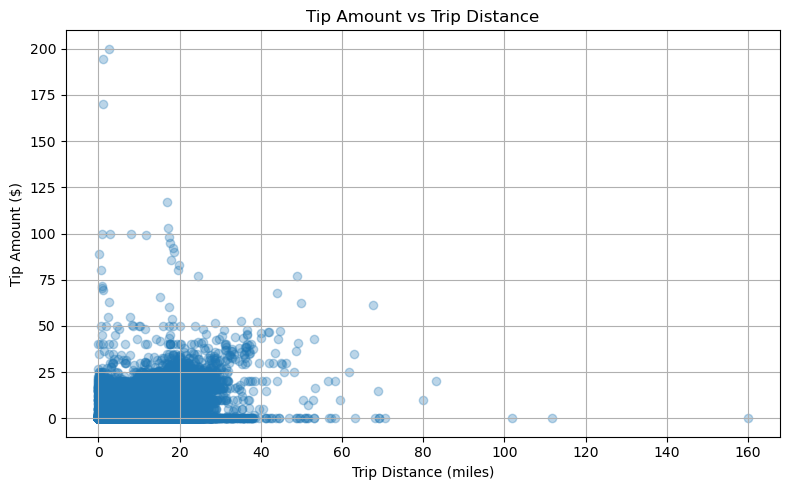

In [141]:
# Show relationship between tip and trip distance
valid_tip = df[df['trip_distance'] > 0]

corr3 = valid_tip['tip_amount'].corr(valid_tip['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {corr3:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(valid_tip['trip_distance'], valid_tip['tip_amount'], alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Tip Amount vs Trip Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_label
Credit Card    216329
Cash            46039
Dispute          1960
No Charge        1299
Name: count, dtype: int64


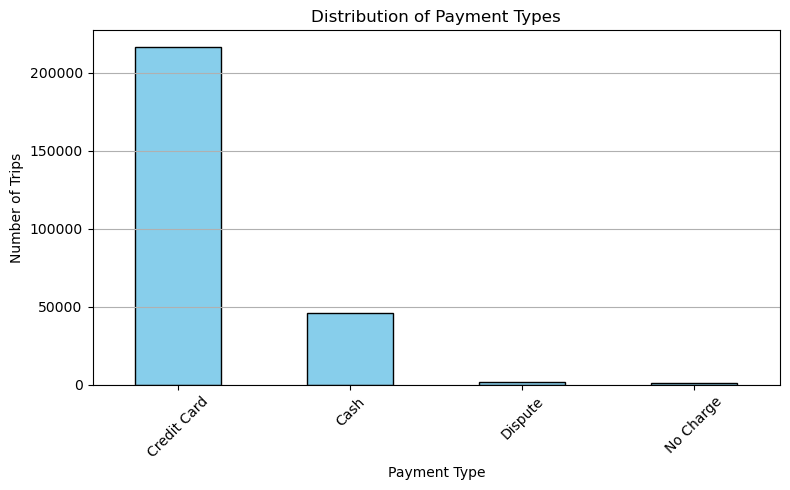

In [143]:
# Analyse the distribution of different payment types (payment_type).
# Map the values to a new column
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_mapping)

# Count the distribution
payment_counts = df['payment_type_label'].value_counts()

print(payment_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [148]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [150]:
import geopandas as gpd

shapefile_path = r"C:\Users\Lenovo\OneDrive\Desktop\UpGrad DSAI Course\NYC EDA Assignment\Data v3\Datasets and Dictionary v3\Datasets and Dictionary v3\taxi_zones"

zones = gpd.read_file(shapefile_path)

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [152]:
print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

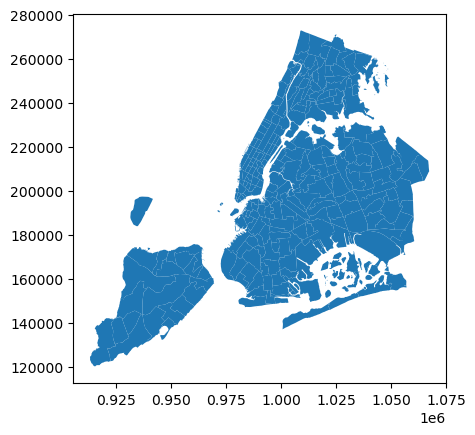

In [153]:
zones.plot()

<Axes: >

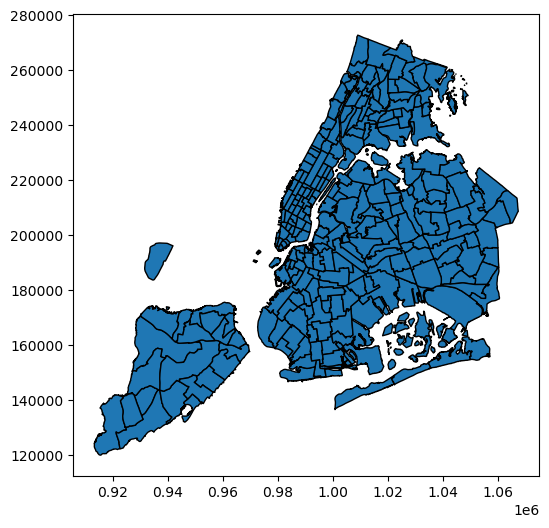

In [154]:
zones.plot(figsize=(10, 6), edgecolor="black")

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [157]:
# Merge zones and trip records using locationID and PULocationID
# Ensuring both columns are of the same type
df['PULocationID'] = df['PULocationID'].astype(int)
zones['LocationID'] = zones['LocationID'].astype(int)

trip_with_zones = pd.merge(df, zones, how='left', left_on='PULocationID', right_on='LocationID')

trip_with_zones.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2023-08-24 23:43:17   2023-08-24 23:49:13              1.0   
1       2.0  2023-06-15 22:51:35   2023-06-15 23:00:48              1.0   
2       2.0  2023-01-20 10:06:26   2023-01-20 10:06:40              1.0   
3       2.0  2023-05-12 19:32:51   2023-05-12 19:58:58              2.0   
4       2.0  2023-06-03 19:23:55   2023-06-03 19:37:14              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.79         1.0                  N           211         148.0   
1           0.78         1.0                  N           230         186.0   
2           0.00         1.0                  N           193         193.0   
3           6.84         1.0                  N           141         256.0   
4           1.60         1.0                  N           161         140.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.2    1.0      0.5        2.44           0.0   
1             1          9.3    1.0      0.5        2.86           0.0   
2             1          3.0    0.0      0.5        0.00           0.0   
3             1         32.4    2.5      0.5        7.78           0.0   
4             1         12.8    0.0      0.5        3.36           0.0   

   improvement_surcharge  total_amount  congestion_surcharge pickup_date  \
0                    1.0         14.64                   2.5  2023-08-24   
1                    1.0         17.16                   2.5  2023-06-15   
2                    1.0          4.50                   0.0  2023-01-20   
3                    1.0         46.68                   2.5  2023-05-12   
4                    1.0         20.16                   2.5  2023-06-03   

   pickup_hour  Airport_fee pickup_dayofweek  pickup_month pickup_quarter  \
0           23          0.0              Thu             8         2023Q3   
1           22          0.0              Thu             6         2023Q2   
2           10          0.0              Fri             1         2023Q1   
3           19          0.0              Fri             5         2023Q2   
4           19          0.0              Sat             6         2023Q2   

   trip_duration payment_type_label  OBJECTID  Shape_Leng  Shape_Area  \
0       5.933333        Credit Card     211.0    0.025235    0.000040   
1       9.216667        Credit Card     230.0    0.031028    0.000056   
2       0.233333        Credit Card     193.0    0.065530    0.000146   
3      26.116667        Credit Card     141.0    0.041514    0.000077   
4      13.316667        Credit Card     161.0    0.035804    0.000072   

                        zone  LocationID    borough  \
0                       SoHo       211.0  Manhattan   
1  Times Sq/Theatre District       230.0  Manhattan   
2    Queensbridge/Ravenswood       193.0     Queens   
3            Lenox Hill West       141.0  Manhattan   
4             Midtown Center       161.0  Manhattan   

                                            geometry  
0  POLYGON ((983827.65 201526.658, 983727.737 201...  
1  POLYGON ((988786.877 214532.094, 988650.277 21...  
2  POLYGON ((1002191.529 219642.382, 1002040.928 ...  
3  POLYGON ((994839.073 216123.698, 994786.74 216...  
4  POLYGON ((991081.026 214453.698, 990952.644 21...

In [158]:
print(trip_with_zones.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_date', 'pickup_hour',
       'Airport_fee', 'pickup_dayofweek', 'pickup_month', 'pickup_quarter',
       'trip_duration', 'payment_type_label', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry'],
      dtype='object')


In [159]:
print(trip_with_zones[['PULocationID', 'zone']].head())

   PULocationID                       zone
0           211                       SoHo
1           230  Times Sq/Theatre District
2           193    Queensbridge/Ravenswood
3           141            Lenox Hill West
4           161             Midtown Center


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [161]:
# Group data by location and calculate the number of trips
# Grouping by zone name and counting number of trips
trip_counts_by_zone = trip_with_zones.groupby('zone').size().reset_index(name='num_trips')

# Sorting by number of trips
trip_counts_by_zone = trip_counts_by_zone.sort_values(by='num_trips', ascending=False)

trip_counts_by_zone.head(10)

zone  num_trips
109                   JFK Airport      14073
141                Midtown Center      12606
209         Upper East Side South      12494
208         Upper East Side North      11280
142                  Midtown East       9560
119             LaGuardia Airport       9303
164  Penn Station/Madison Sq West       9072
123           Lincoln Square East       8955
202     Times Sq/Theatre District       8870
150                   Murray Hill       7927

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [163]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_counts = zones.merge(trip_counts_by_zone, how='left', on='zone')

# Fill NaNs in num_trips with 0 for zones with no trips
zones_with_counts['num_trips'] = zones_with_counts['num_trips'].fillna(0)

zones_with_counts[['zone', 'num_trips']].head()

zone  num_trips
0           Newark Airport       37.0
1              Jamaica Bay        2.0
2  Allerton/Pelham Gardens        8.0
3            Alphabet City      289.0
4            Arden Heights        2.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1200x1000 with 0 Axes>

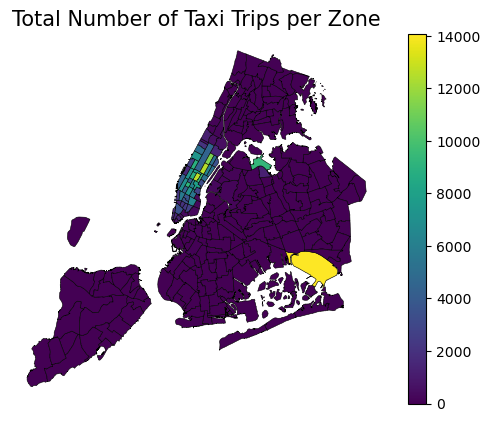

In [167]:
# Set up the figure
plt.figure(figsize=(12, 10))
zones_with_counts.plot(
    column='num_trips',
    cmap='viridis',
    legend=True,
    edgecolor='black',
    linewidth=0.4,
)

# Plot using a color gradient for number of trips
plt.title('Total Number of Taxi Trips per Zone', fontsize=15)
plt.axis('off')
plt.show()

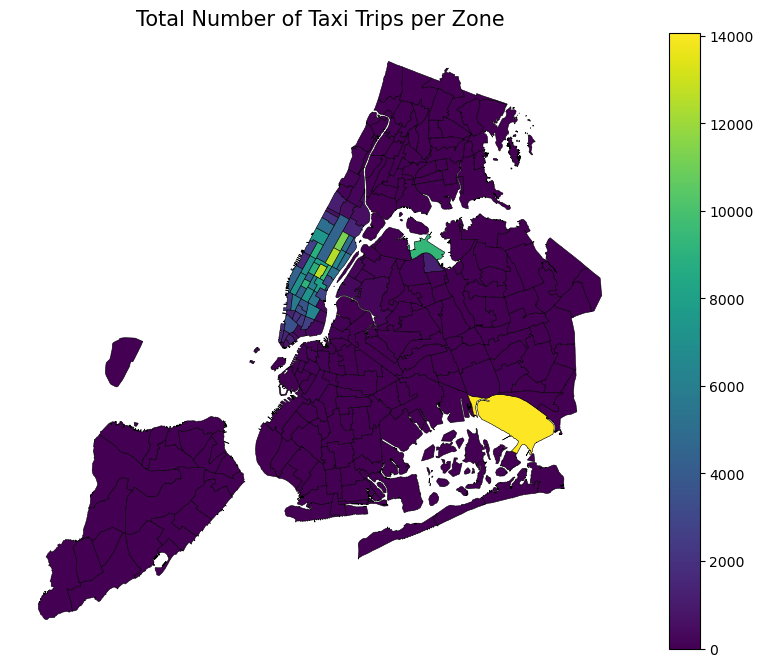

In [168]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the map and display it
zones_with_counts.plot(
    column='num_trips',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title('Total Number of Taxi Trips per Zone', fontsize=15)
ax.axis('off')
plt.show()

In [169]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_counts[['zone', 'borough', 'num_trips']].sort_values(by='num_trips', ascending=False)
display(sorted_zones.head(10))

zone    borough  num_trips
131                   JFK Airport     Queens    14073.0
160                Midtown Center  Manhattan    12606.0
236         Upper East Side South  Manhattan    12494.0
235         Upper East Side North  Manhattan    11280.0
161                  Midtown East  Manhattan     9560.0
137             LaGuardia Airport     Queens     9303.0
185  Penn Station/Madison Sq West  Manhattan     9072.0
141           Lincoln Square East  Manhattan     8955.0
229     Times Sq/Theatre District  Manhattan     8870.0
169                   Murray Hill  Manhattan     7927.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [178]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter out invalid durations or distances (zero or negative)
valid_trips = df[(df['trip_duration_hours'] > 0) & (df['trip_distance'] > 0)]

# Group by route and hour
grouped = valid_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

# Calculate average speed
route_speeds = grouped.apply(lambda g: g['trip_distance'].sum() / g['trip_duration_hours'].sum()).reset_index(name='avg_speed_mph')

# Sort slowest routes first
slow_routes = route_speeds.sort_values(by='avg_speed_mph', ascending=True)

# Show top 10 slowest routes by hour
slow_routes.head(10)

PULocationID  DOLocationID  pickup_hour  avg_speed_mph
48265           232          65.0           13       0.005324
30057           144         125.0            4       0.023165
31896           151          24.0            1       0.032131
2496             43          50.0            9       0.047161
16596           113         235.0           22       0.048105
5239             50         100.0           22       0.056618
44241           224         113.0           20       0.070330
11683            88         144.0            0       0.074923
6140             67         215.0           15       0.078091
31671           148         232.0           12       0.085269

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

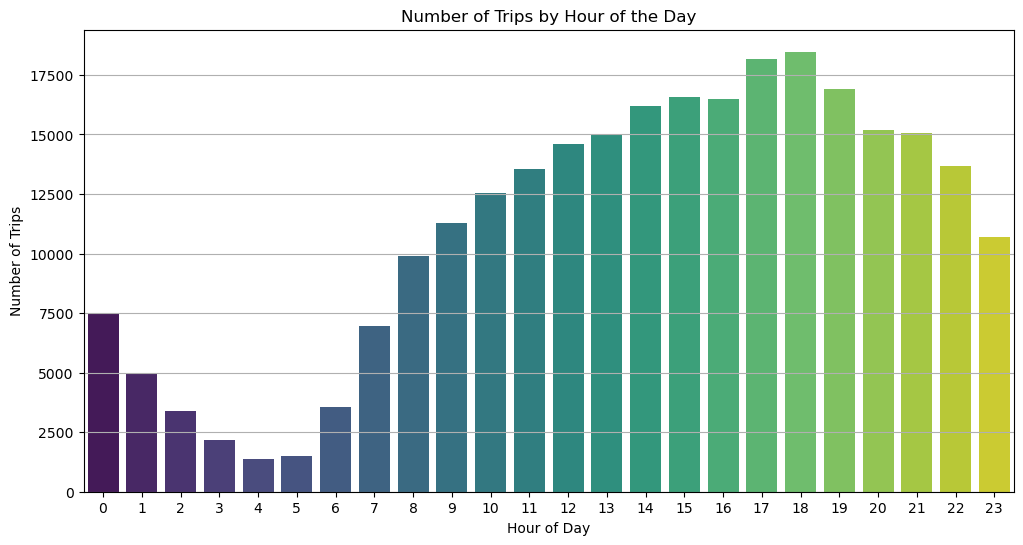

Busiest hour of the day: 18:00 with 18,473 trips.


In [181]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculating number of trips per hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette='viridis')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True, axis='y')
plt.show()

# Busiest hour and number of trips
busiest_hour = hourly_trips.idxmax()
num_trips_busiest_hour = hourly_trips.max()

print(f'Busiest hour of the day: {busiest_hour}:00 with {num_trips_busiest_hour:,} trips.')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [184]:
# Scale up the number of trips
sample_fraction = 275000 / 1896400

zones_with_counts['scaled_trips'] = zones_with_counts['num_trips'] / sample_fraction

display(zones_with_counts[['zone', 'borough', 'num_trips', 'scaled_trips']].sort_values(by='scaled_trips', ascending=False).head(10))

zone    borough  num_trips  scaled_trips
131                   JFK Airport     Queens    14073.0     97047.408
160                Midtown Center  Manhattan    12606.0     86930.976
236         Upper East Side South  Manhattan    12494.0     86158.624
235         Upper East Side North  Manhattan    11280.0     77786.880
161                  Midtown East  Manhattan     9560.0     65925.760
137             LaGuardia Airport     Queens     9303.0     64153.488
185  Penn Station/Madison Sq West  Manhattan     9072.0     62560.512
141           Lincoln Square East  Manhattan     8955.0     61753.680
229     Times Sq/Theatre District  Manhattan     8870.0     61167.520
169                   Murray Hill  Manhattan     7927.0     54664.592

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

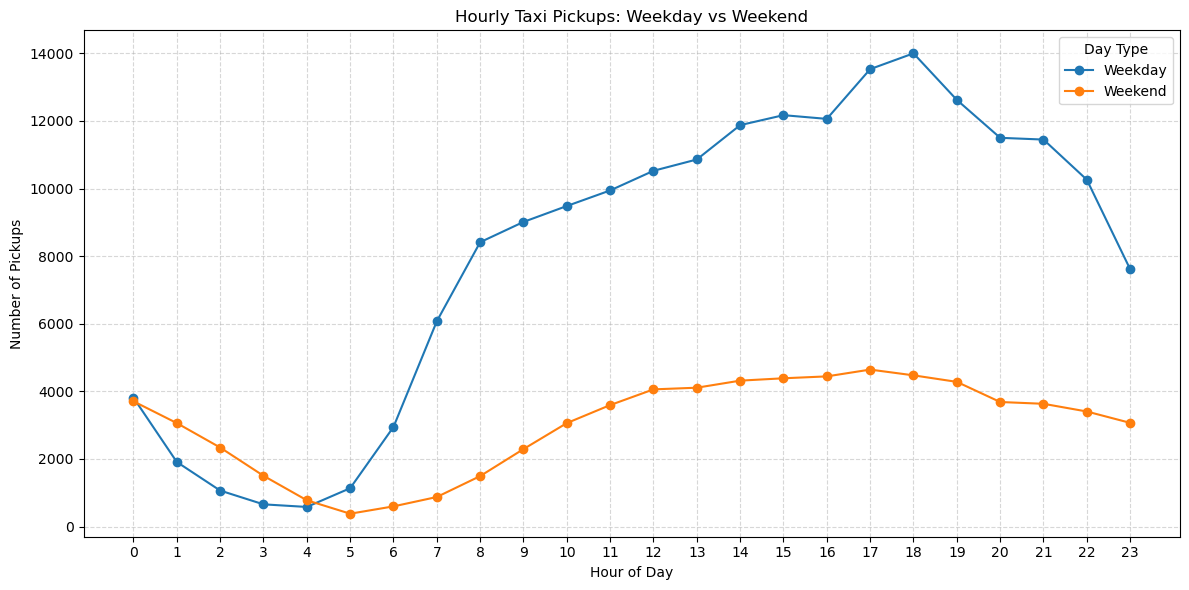

In [186]:
# Compare traffic trends for the week days and weekends
# Grouping by hour and week status
trip_with_zones['is_weekend'] = trip_with_zones['pickup_dayofweek'].isin(['Sat', 'Sun'])

hourly_counts = trip_with_zones.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='num_trips')

hourly_pivot = hourly_counts.pivot(index='pickup_hour', columns='is_weekend', values='num_trips')
hourly_pivot.columns = ['Weekday', 'Weekend']

plt.figure(figsize=(12, 6))
hourly_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Hourly Taxi Pickups: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

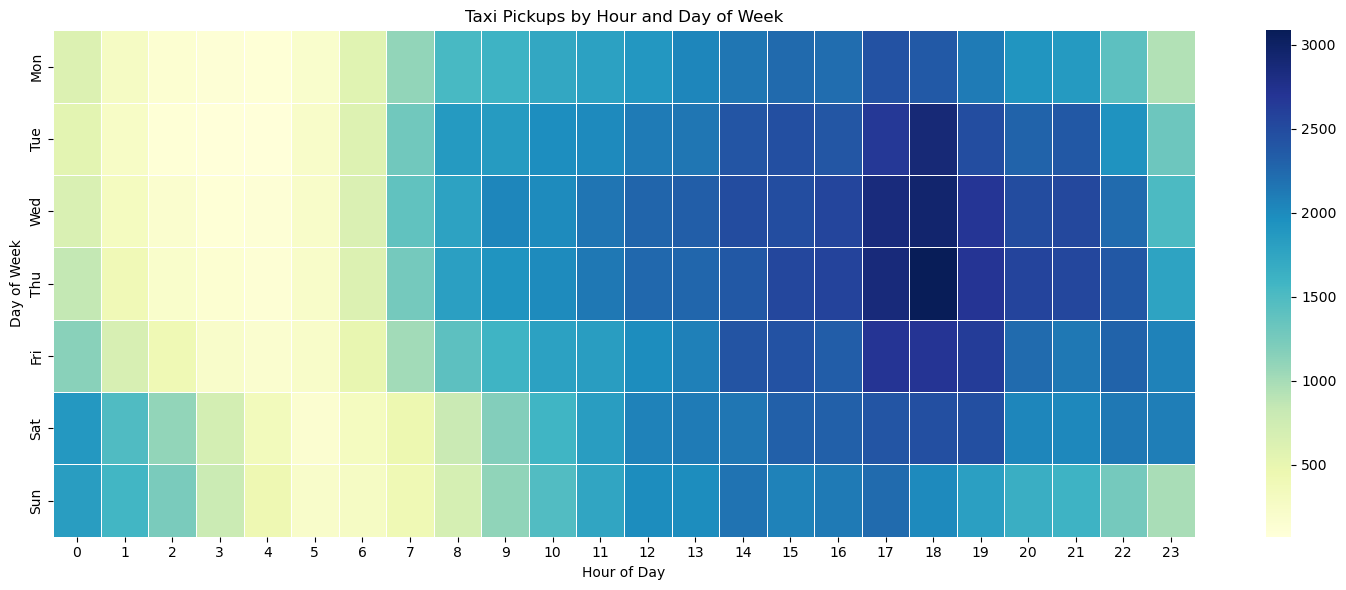

In [188]:
# Group by day of week and pickup hour
hourly_day_counts = trip_with_zones.groupby(['pickup_dayofweek', 'pickup_hour']).size().reset_index(name='num_trips')

# Sorting days for consistency
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hourly_day_counts['pickup_dayofweek'] = pd.Categorical(hourly_day_counts['pickup_dayofweek'], categories=day_order, ordered=True)
hourly_day_counts = hourly_day_counts.sort_values(['pickup_dayofweek', 'pickup_hour'])

pivot_table = hourly_day_counts.pivot(index='pickup_dayofweek', columns='pickup_hour', values='num_trips')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title("Taxi Pickups by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [190]:
# Ensure pickup_hour exists
if 'pickup_hour' not in trip_with_zones.columns:
    trip_with_zones['pickup_hour'] = trip_with_zones['tpep_pickup_datetime'].dt.hour


In [191]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup zones
pickup_counts = trip_with_zones.groupby('zone').size().sort_values(ascending=False).head(10)
top_pickup_zones = pickup_counts.index.tolist()

# Top 10 dropoff zones
dropoff_counts = trip_with_zones.groupby('DOLocationID').size().sort_values(ascending=False).head(10)
top_dropoff_ids = dropoff_counts.index.tolist()
top_dropoff_zones = trip_with_zones[trip_with_zones['DOLocationID'].isin(top_dropoff_ids)][['DOLocationID', 'zone']].drop_duplicates()['zone'].tolist()
top_dropoff_zones[0:10]

['Gramercy',
 'Lenox Hill West',
 'Upper West Side North',
 'Lenox Hill East',
 'West Chelsea/Hudson Yards',
 'Sutton Place/Turtle Bay North',
 'Midtown East',
 'Yorkville West',
 'Yorkville East',
 'Meatpacking/West Village West']

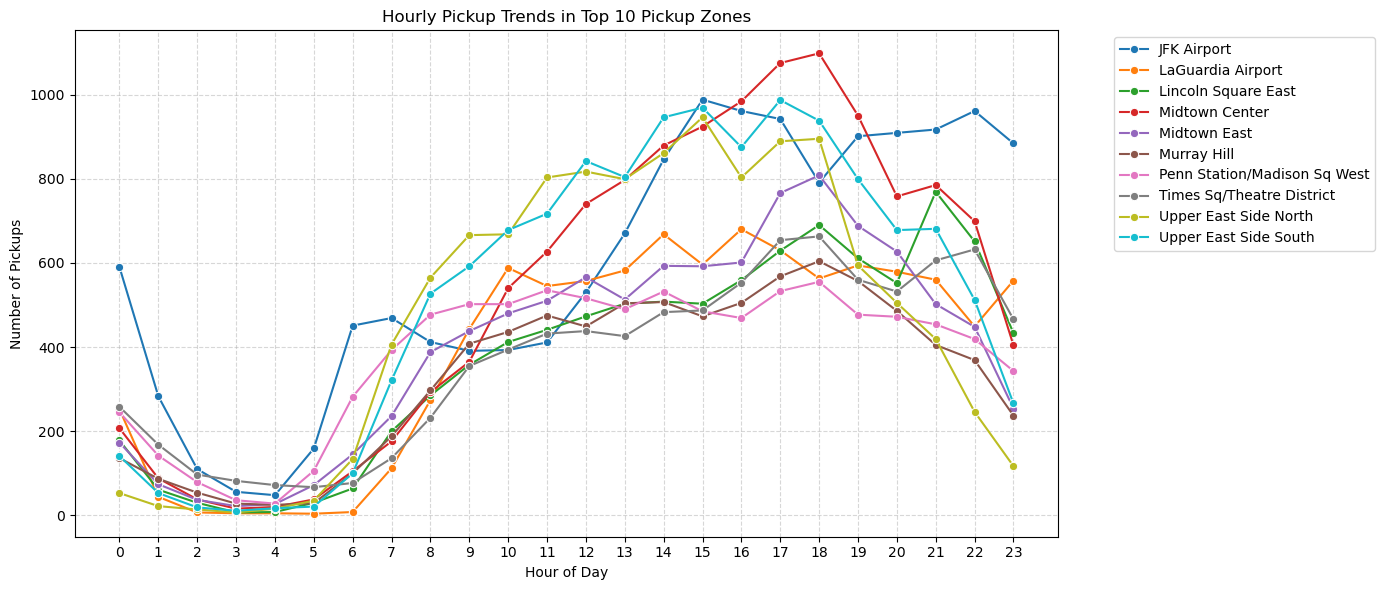

In [192]:
# Filter data for top pickup zones
pickup_data = trip_with_zones[trip_with_zones['zone'].isin(top_pickup_zones)]

# Group by zone and hour
pickup_hourly = pickup_data.groupby(['zone', 'pickup_hour']).size().reset_index(name='pickup_count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_hourly, x='pickup_hour', y='pickup_count', hue='zone', marker='o')
plt.title('Hourly Pickup Trends in Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

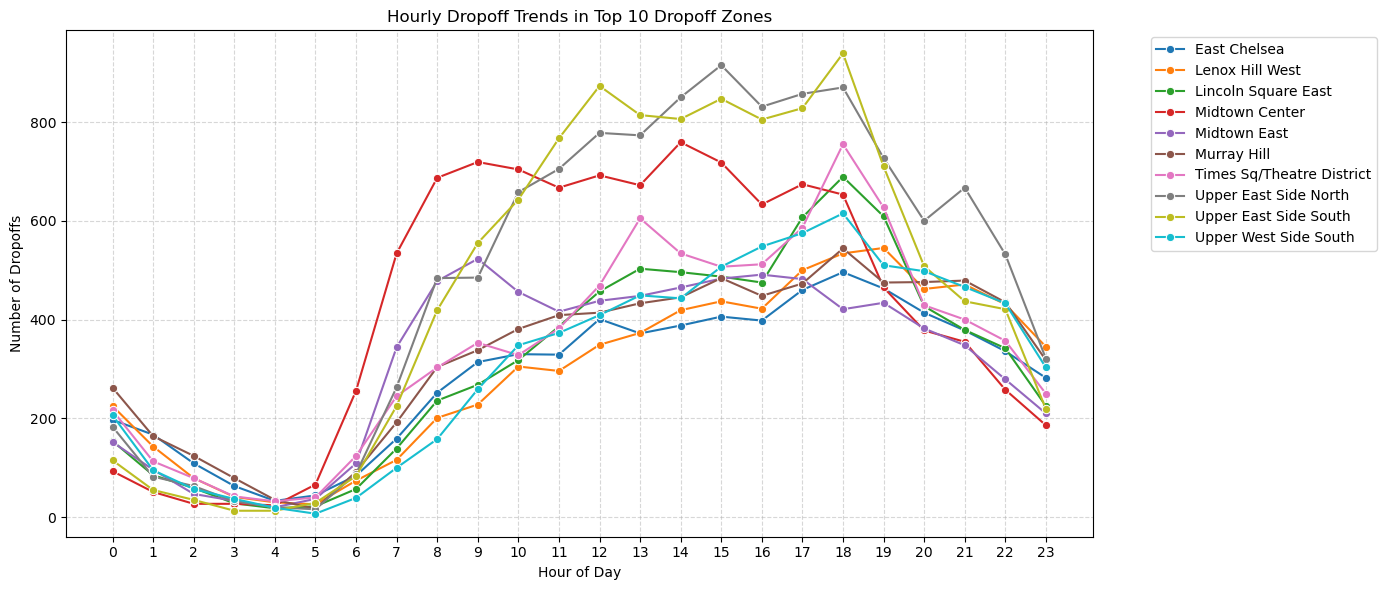

In [193]:
# Merging dropoff zone names
zones = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})
trip_with_drop_zones = pd.merge(trip_with_zones, zones[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')

# Recalculating top 10 dropoff zones
top_dropoff_zones = trip_with_drop_zones['dropoff_zone'].value_counts().nlargest(10).index.tolist()

# Filter data for top dropoff zones
dropoff_data = trip_with_drop_zones[trip_with_drop_zones['dropoff_zone'].isin(top_dropoff_zones)]

# Ensure dropoff hour is added
dropoff_data['dropoff_hour'] = dropoff_data['tpep_dropoff_datetime'].dt.hour

# Group by dropoff zone and hour
dropoff_hourly = dropoff_data.groupby(['dropoff_zone', 'dropoff_hour']).size().reset_index(name='dropoff_count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_hourly, x='dropoff_hour', y='dropoff_count', hue='dropoff_zone', marker='o')
plt.title('Hourly Dropoff Trends in Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [195]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Drop duplicate DOLocationID values for correct mapping
zones_unique = zones.drop_duplicates(subset='DOLocationID')

# Create mapping
zones_lookup = zones_unique.set_index('DOLocationID')['dropoff_zone']

trip_with_zones['dropoff_zone'] = trip_with_zones['DOLocationID'].map(zones_lookup)

# Counting pickups and dropoffs
pickup_counts = trip_with_zones['zone'].value_counts()
dropoff_counts = trip_with_zones['dropoff_zone'].value_counts()

# Combining into one DataFrame
ratios = pd.concat([pickup_counts, dropoff_counts], axis=1)
ratios.columns = ['pickup_count', 'dropoff_count']
ratios = ratios.fillna(0)

# Compute ratio safely
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)

# Computing top and bottom 10
top_10 = ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = ratios.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios (by zone):")
display(top_10)

print("Bottom 10 Pickup/Dropoff Ratios (by zone):")
display(bottom_10)

Top 10 Pickup/Dropoff Ratios (by zone):


pickup_count  dropoff_count  \
East Elmhurst                       1210.0          136.0   
JFK Airport                        14073.0         3041.0   
LaGuardia Airport                   9303.0         3224.0   
Charleston/Tottenville                 4.0            2.0   
Penn Station/Madison Sq West        9072.0         5715.0   
Greenwich Village South             3536.0         2557.0   
Central Park                        4460.0         3260.0   
Midtown East                        9560.0         7592.0   
West Village                        5752.0         4588.0   
Midtown Center                     12606.0        10298.0   

                              pickup_dropoff_ratio  
East Elmhurst                             8.897059  
JFK Airport                               4.627754  
LaGuardia Airport                         2.885546  
Charleston/Tottenville                    2.000000  
Penn Station/Madison Sq West              1.587402  
Greenwich Village South                   1.382871  
Central Park                              1.368098  
Midtown East                              1.259220  
West Village                              1.253705  
Midtown Center                            1.224121

Bottom 10 Pickup/Dropoff Ratios (by zone):


pickup_count  dropoff_count  \
Grymes Hill/Clifton                           0.0            1.0   
Douglaston                                    0.0           27.0   
Bronx Park                                    0.0           21.0   
West Brighton                                 0.0            9.0   
Breezy Point/Fort Tilden/Riis Beach           0.0            9.0   
City Island                                   0.0            8.0   
Country Club                                  0.0            6.0   
South Beach/Dongan Hills                      0.0            5.0   
Stapleton                                     0.0            4.0   
Green-Wood Cemetery                           0.0            4.0   

                                     pickup_dropoff_ratio  
Grymes Hill/Clifton                                   0.0  
Douglaston                                            0.0  
Bronx Park                                            0.0  
West Brighton                                         0.0  
Breezy Point/Fort Tilden/Riis Beach                   0.0  
City Island                                           0.0  
Country Club                                          0.0  
South Beach/Dongan Hills                              0.0  
Stapleton                                             0.0  
Green-Wood Cemetery                                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [202]:
# Creating 'dropoff_hour' column
trip_with_zones['dropoff_hour'] = trip_with_zones['tpep_dropoff_datetime'].dt.hour

# Defining night hours (11pm to 5am)
night_hours = list(range(0, 6)) + [23]

# Filtering night pickups
night_pickups = trip_with_zones[trip_with_zones['pickup_hour'].isin(night_hours)]

# Top 10 pickup zones based on 'zone' column
night_pickup_counts = night_pickups['zone'].value_counts().head(10)
print("Top 10 Pickup Zones During Night Hours:")
display(night_pickup_counts)

# Filtering night dropoffs
night_dropoffs = trip_with_zones[trip_with_zones['dropoff_hour'].isin(night_hours)]

# Top 10 pickup and dropoff zones using existing column
night_dropoff_counts = night_dropoffs['dropoff_zone'].value_counts().head(10)
print("Top 10 Dropoff Zones During Night Hours:")
display(night_dropoff_counts)

Top 10 Pickup Zones During Night Hours:


zone
East Village                    2270
JFK Airport                     2130
West Village                    1732
Clinton East                    1496
Lower East Side                 1425
Greenwich Village South         1309
Times Sq/Theatre District       1210
Penn Station/Madison Sq West     979
Midtown South                    902
East Chelsea                     897
Name: count, dtype: int64

Top 10 Dropoff Zones During Night Hours:


dropoff_zone
East Village                 1275
Clinton East                 1092
Murray Hill                   999
Gramercy                      919
East Chelsea                  895
Lenox Hill West               889
Yorkville West                779
Times Sq/Theatre District     772
West Village                  760
Upper West Side South         724
Name: count, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [204]:
# Filter for night hours (11 PM to 5 AM)
# Defining night and day hours
night_hours = list(range(0, 6)) + [23]
day_hours = list(range(6, 23))

# Classifying trips as Night or Day
trip_with_zones['time_segment'] = trip_with_zones['pickup_hour'].apply(
    lambda x: 'Night' if x in night_hours else 'Day'
)

# Group by time segment and sum revenue
revenue_by_segment = trip_with_zones.groupby('time_segment')['total_amount'].sum().reset_index()

# Calculating total revenue and share
total_revenue = revenue_by_segment['total_amount'].sum()
revenue_by_segment['revenue_share_%'] = (revenue_by_segment['total_amount'] / total_revenue * 100).round(2)

display(revenue_by_segment)

time_segment  total_amount  revenue_share_%
0          Day    6726214.49            87.85
1        Night     930012.47            12.15

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [206]:
# Analyse the fare per mile per passenger for different passenger counts
# Filtering zero or missing values and outliers
valid_trips = trip_with_zones[
    (trip_with_zones['trip_distance'] > 0) &
    (trip_with_zones['passenger_count'] > 0) &
    (trip_with_zones['fare_amount'] > 0)
].copy()

# Computing fare per mile per passenger
valid_trips['fare_per_mile_per_passenger'] = (
    valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count'])
)

# Computing average fare per mile per passenger
pricing_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

pricing_analysis['fare_per_mile_per_passenger'] = pricing_analysis['fare_per_mile_per_passenger'].round(2)

print("Fare per Mile per Passenger by Passenger Count:")
display(pricing_analysis)

Fare per Mile per Passenger by Passenger Count:


passenger_count  fare_per_mile_per_passenger
0              1.0                        10.64
1              2.0                         6.36
2              3.0                         3.61
3              4.0                         4.98
4              5.0                         1.80
5              6.0                         1.29

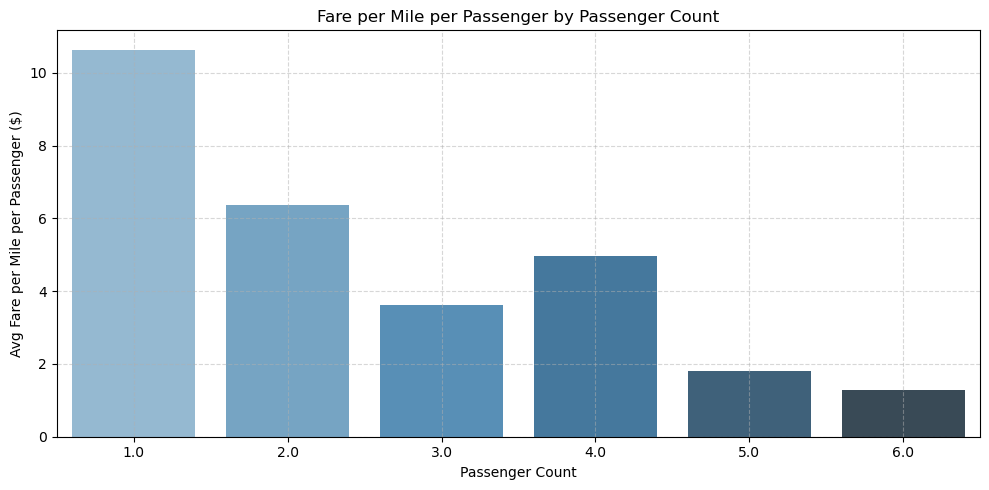

In [208]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pricing_analysis, x='passenger_count', y='fare_per_mile_per_passenger', palette='Blues_d')
plt.title('Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare per Mile per Passenger ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [228]:
pd.set_option('display.max_rows', 10) 
# Compare the average fare per mile for different days and for different times of the day
# Filter valid trips to avoid divide-by-zero issues
valid_trips = trip_with_zones[
    (trip_with_zones['trip_distance'] > 0) &
    (trip_with_zones['fare_amount'] > 0)
].copy()

# Compute fare per mile
fare_per_mile = valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
fare_per_mile

0          9.113924
1         11.923077
3          4.736842
4          8.000000
5          5.427729
            ...    
265642     6.838710
265643     6.066351
265644     6.445783
265645     7.845304
265646     8.869048
Length: 262360, dtype: float64

In [212]:
# Compare the average fare per mile for different days and for different times of the day
# Create fare per mile column
trip_with_zones['fare_per_mile'] = trip_with_zones['fare_amount'] / trip_with_zones['trip_distance']

# Filter out invalid or extreme values to remove outliers
valid_fare_data = trip_with_zones[
    (trip_with_zones['fare_per_mile'] > 0) &
    (trip_with_zones['fare_per_mile'] < 100)
]

# Extract day of week and pickup hour
valid_fare_data['day_of_week'] = valid_fare_data['tpep_pickup_datetime'].dt.day_name()
valid_fare_data['pickup_hour'] = valid_fare_data['tpep_pickup_datetime'].dt.hour

# Average fare per mile by day of week
avg_fare_by_day = valid_fare_data.groupby('day_of_week')['fare_per_mile'].mean().sort_values(ascending=False)
print("Average Fare per Mile by Day of Week:")
display(avg_fare_by_day)

# Average fare per mile by hour of day
avg_fare_by_hour = valid_fare_data.groupby('pickup_hour')['fare_per_mile'].mean()
print("Average Fare per Mile by Hour of Day:")
display(avg_fare_by_hour)

Average Fare per Mile by Day of Week:


day_of_week
Wednesday    8.208307
Thursday     8.182636
Tuesday      8.135452
Friday       7.906050
Saturday     7.770805
Monday       7.457201
Sunday       7.089495
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of Day:


pickup_hour
0     6.514497
1     6.648301
2     6.539515
3     6.522693
4     5.916022
5     5.882730
6     6.309313
7     7.018174
8     7.684436
9     8.013979
10    8.247908
11    8.520235
12    8.644873
13    8.556221
14    8.516056
15    8.535826
16    8.425831
17    8.394420
18    8.238876
19    7.903189
20    7.310631
21    7.048429
22    6.918774
23    6.632725
Name: fare_per_mile, dtype: float64

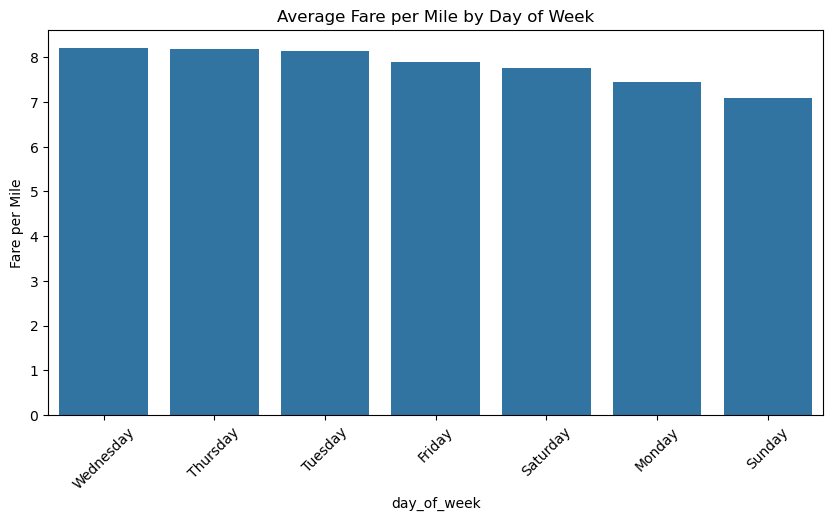

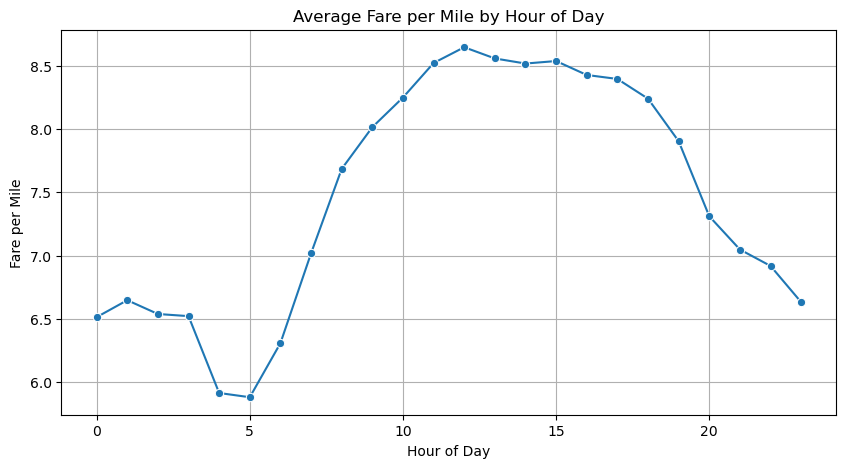

In [214]:
# Bar plot by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values)
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Fare per Mile')
plt.xticks(rotation=45)
plt.show()

# Line plot by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.show()

In [216]:
# Recalculate fare per mile (no filtering or capping)
trip_with_zones['fare_per_mile'] = trip_with_zones['fare_amount'] / trip_with_zones['trip_distance']

# Remove zero or negative distances to avoid division by zero or nonsense values
valid_fare_data = trip_with_zones[trip_with_zones['trip_distance'] > 0]

# Extract day of week and pickup hour
valid_fare_data['day_of_week'] = valid_fare_data['tpep_pickup_datetime'].dt.day_name()
valid_fare_data['pickup_hour'] = valid_fare_data['tpep_pickup_datetime'].dt.hour

# Group and calculate average fare per mile by day of week
avg_fare_by_day = valid_fare_data.groupby('day_of_week')['fare_per_mile'].mean().sort_values(ascending=False)
print("Average Fare per Mile by Day of Week:")
display(avg_fare_by_day)

# Group and calculate average fare per mile by hour
avg_fare_by_hour = valid_fare_data.groupby('pickup_hour')['fare_per_mile'].mean()
print("Average Fare per Mile by Hour of Day:")
display(avg_fare_by_hour)

Average Fare per Mile by Day of Week:


day_of_week
Sunday       12.325910
Thursday     11.623371
Monday       11.211533
Wednesday    11.171627
Friday       10.702425
Saturday     10.429303
Tuesday      10.214347
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of Day:


pickup_hour
0     12.570638
1     12.395791
2     12.139774
3      7.956527
4     10.480706
5     10.556280
6     12.368021
7      8.889368
8     10.101882
9      9.470892
10    10.595250
11    10.534412
12    11.946195
13    11.199816
14    10.758913
15    11.470891
16    16.269785
17    11.407169
18    12.126549
19    11.328933
20     9.386006
21     9.595002
22     9.465090
23     9.038117
Name: fare_per_mile, dtype: float64

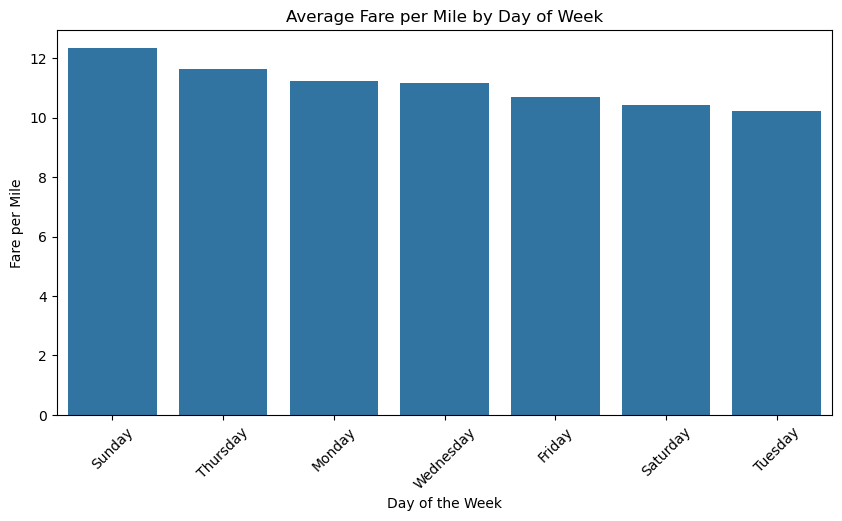

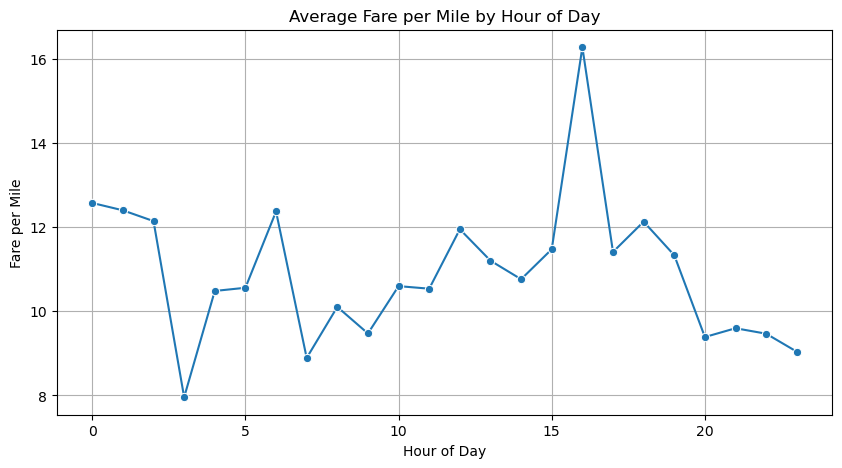

In [222]:
# Plot by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values)
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare per Mile')
plt.xticks(rotation=45)
plt.show()

# Plot by hour of day
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile')
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [232]:
# Calculating fare_per_mile 
valid_trips = trip_with_zones[
    (trip_with_zones['trip_distance'] > 0) &
    (trip_with_zones['fare_amount'] > 0)
].copy()

valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Defining distance tiers
def get_distance_tier(dist):
    if dist <= 2:
        return 'Short (<= 2 miles)'
    elif dist <= 5:
        return 'Medium (2-5 miles)'
    else:
        return 'Long (> 5 miles)'

valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(get_distance_tier)

# Group by VendorID and distance tier
vendor_fare_analysis = valid_trips.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Sort and display
vendor_fare_analysis = vendor_fare_analysis.sort_values(by=['VendorID', 'distance_tier'])
display(vendor_fare_analysis)

VendorID       distance_tier  fare_per_mile
0       1.0    Long (> 5 miles)       4.400549
1       1.0  Medium (2-5 miles)       6.375606
2       1.0  Short (<= 2 miles)       9.828819
3       2.0    Long (> 5 miles)       4.499252
4       2.0  Medium (2-5 miles)       6.543654
5       2.0  Short (<= 2 miles)      17.480623

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [234]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filtering trips where tip and fare are positive
valid_trips = trip_with_zones[
    (trip_with_zones['fare_amount'] > 0) &
    (trip_with_zones['tip_amount'] >= 0)
].copy()

# Computing tip percentage
valid_trips['tip_percent'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

# Distance Tiers
def distance_tier(dist):
    if dist <= 2:
        return 'Short (<=2 miles)'
    elif dist <= 5:
        return 'Medium (2-5 miles)'
    else:
        return 'Long (>5 miles)'

valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(distance_tier)

# Tip % by Distance Tier
tip_by_distance = valid_trips.groupby('distance_tier')['tip_percent'].mean().reset_index()
print("Average Tip % by Distance Tier")
display(tip_by_distance)

# Tip % by Passenger Count
tip_by_passenger = valid_trips.groupby('passenger_count')['tip_percent'].mean().reset_index()
print("Average Tip % by Passenger Count")
display(tip_by_passenger)

# Tip % by Pickup Hour
tip_by_hour = valid_trips.groupby('pickup_hour')['tip_percent'].mean().reset_index()
print("Average Tip % by Pickup Hour")
display(tip_by_hour)

Average Tip % by Distance Tier


distance_tier  tip_percent
0     Long (>5 miles)    16.458731
1  Medium (2-5 miles)    18.786589
2   Short (<=2 miles)    29.133305

Average Tip % by Passenger Count


passenger_count  tip_percent
0              0.0    19.495805
1              1.0    25.703686
2              2.0    19.935514
3              3.0    18.742368
4              4.0    17.206164
5              5.0    20.397446
6              6.0    21.284766

Average Tip % by Pickup Hour


pickup_hour  tip_percent
0             0    61.000953
1             1    21.005274
2             2    21.047637
3             3    20.799632
4             4    19.290205
..          ...          ...
19           19    22.178644
20           20    21.362494
21           21    21.419549
22           22    21.248543
23           23    20.619634

[24 rows x 2 columns]

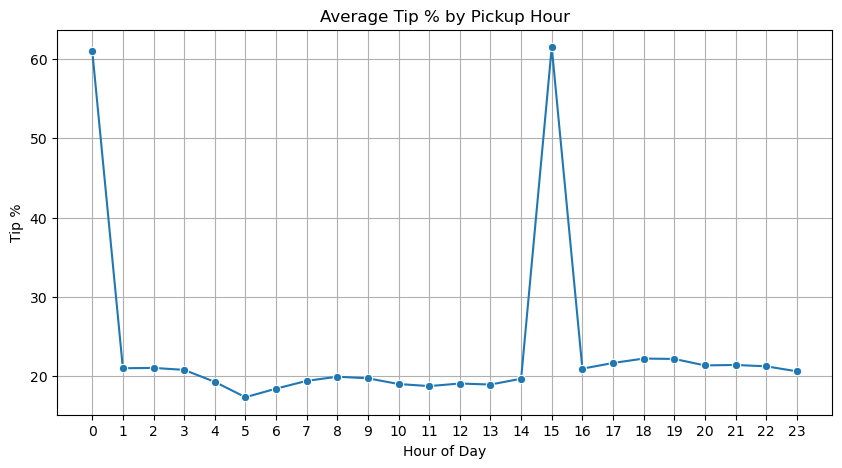

In [236]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip %')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

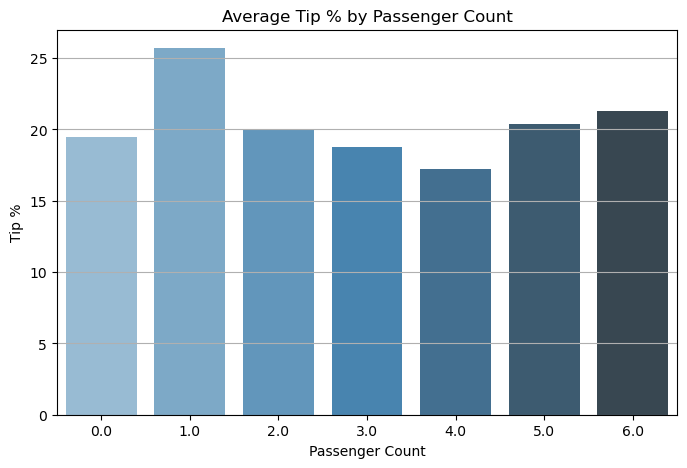

In [240]:
plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Blues_d')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.grid(axis='y')
plt.show()

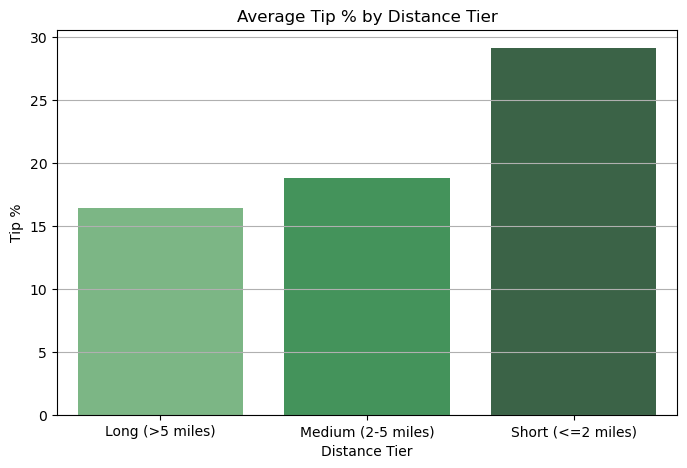

In [243]:
plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percent', palette='Greens_d')
plt.title('Average Tip % by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Tip %')
plt.grid(axis='y')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

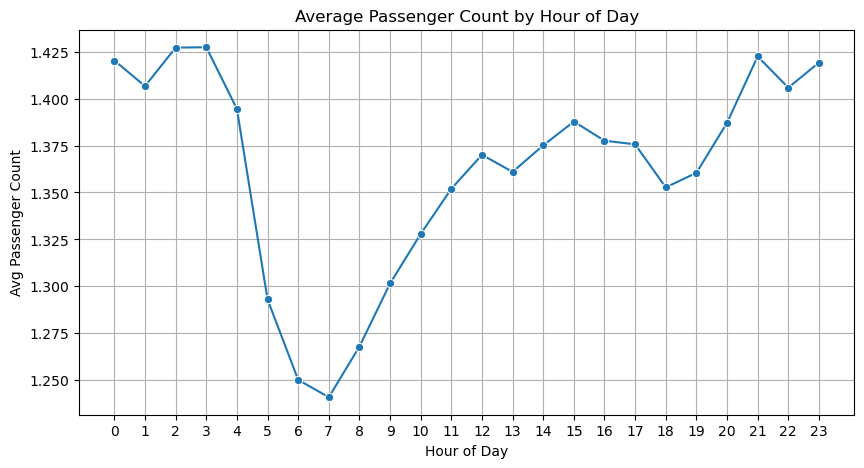

In [246]:
# See how passenger count varies across hours and days
# Group by pickup hour and compute average passenger count
hourly_passenger = trip_with_zones.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_passenger, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

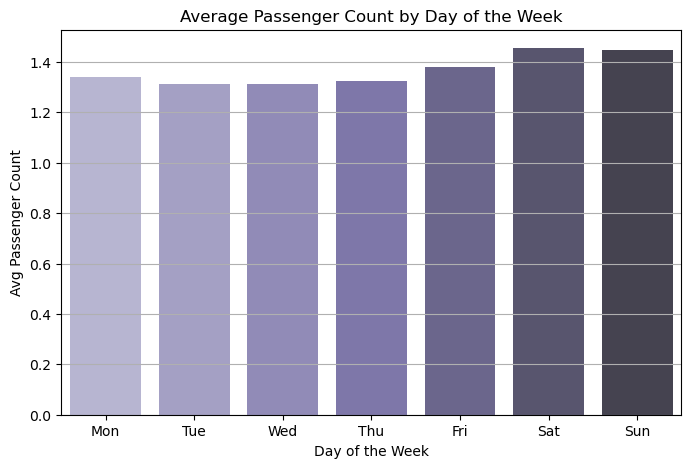

In [254]:
# Making sure pickup_datetime is in datetime format
trip_with_zones['tpep_pickup_datetime'] = pd.to_datetime(trip_with_zones['tpep_pickup_datetime'])

# Create day of week column
trip_with_zones['day_of_week'] = trip_with_zones['tpep_pickup_datetime'].dt.dayofweek

# Map day numbers to day names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
trip_with_zones['day_of_week'] = trip_with_zones['day_of_week'].map(day_map)

# Group and plot
weekday_passenger = trip_with_zones.groupby('day_of_week')['passenger_count'].mean().reset_index()
weekday_passenger['day_of_week'] = pd.Categorical(weekday_passenger['day_of_week'], categories=list(day_map.values()), ordered=True)
weekday_passenger = weekday_passenger.sort_values('day_of_week')

plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_passenger, x='day_of_week', y='passenger_count', palette='Purples_d')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Passenger Count')
plt.grid(axis='y')
plt.show()

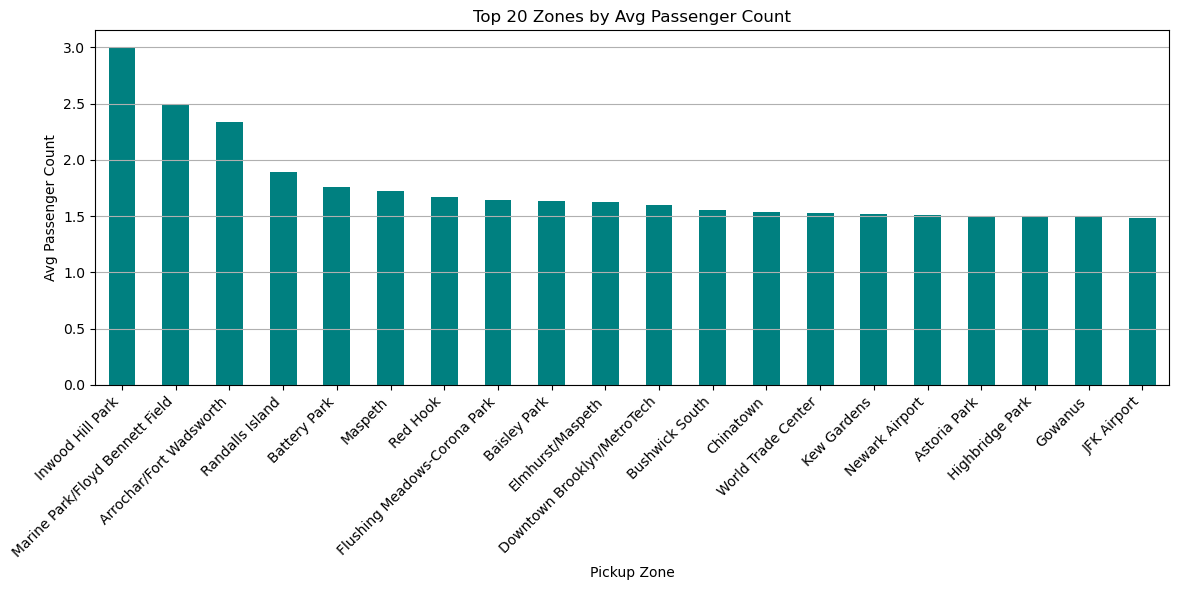

In [250]:
# How does passenger count vary across zones
# Group by pickup zone and get average passenger count
zone_passenger = trip_with_zones.groupby('zone')['passenger_count'].mean().sort_values(ascending=False).head(20)

# Plot top 20 zones
plt.figure(figsize=(12,6))
zone_passenger.plot(kind='bar', color='teal')
plt.title('Top 20 Zones by Avg Passenger Count')
plt.xlabel('Pickup Zone')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

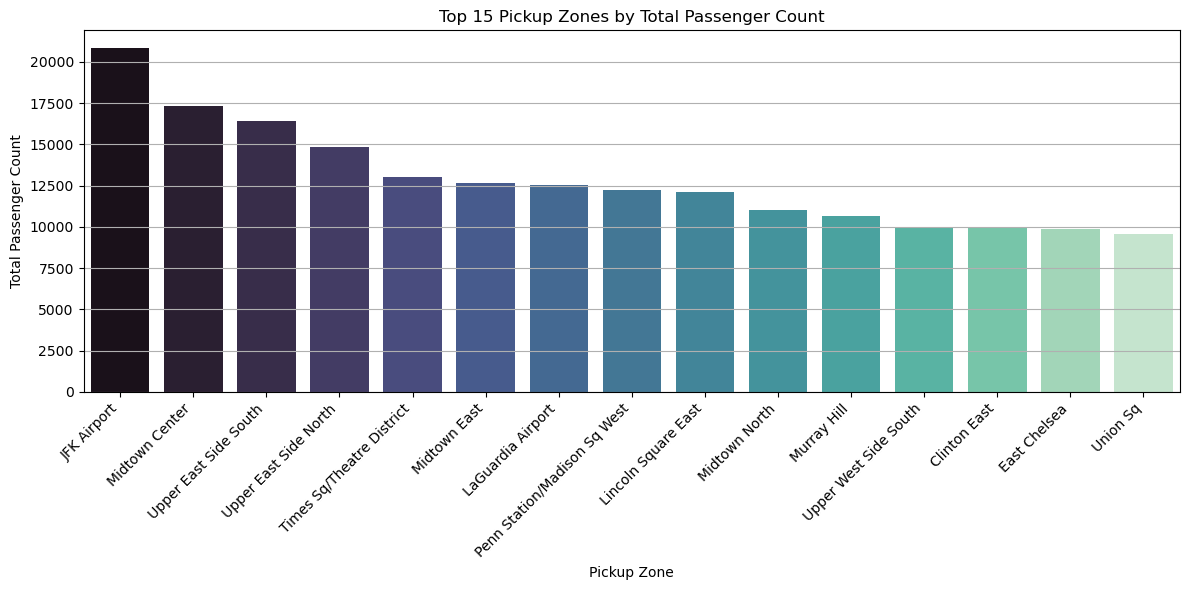

In [257]:
# How does passenger count vary across zones

# Group by pickup zone and calculate average and total passenger count
zone_passenger_stats = trip_with_zones.groupby('zone')['passenger_count'].agg(['mean', 'sum']).reset_index()

# Sorting by total passengers to highlight most popular zones
zone_passenger_stats = zone_passenger_stats.sort_values(by='sum', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_stats.head(15), x='zone', y='sum', palette='mako')
plt.title('Top 15 Pickup Zones by Total Passenger Count')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [261]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Calculating average passenger count per pickup zone
avg_passenger_by_zone = trip_with_zones.groupby('zone')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merging with GeoDataframe
zones_with_trips = zones.merge(avg_passenger_by_zone, how='left', left_on='dropoff_zone', right_on='zone')

# Filling missing values
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

<Figure size 1200x1000 with 0 Axes>

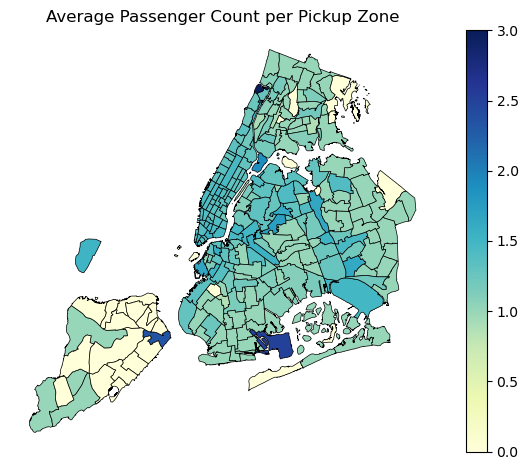

In [263]:
# Plot average passenger count per zone
plt.figure(figsize=(12, 10))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Average Passenger Count per Pickup Zone')
plt.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [267]:
# How often is each surcharge applied?

# Filter trips where extra charges are applied
trips_with_extra = trip_with_zones[trip_with_zones['extra'] > 0]

# Top pickup zones with most extra charges
extra_by_pickup_zone = trips_with_extra['zone'].value_counts().head(10)
print("Top Pickup Zones with Extra Charges:")
display(extra_by_pickup_zone)

# Top dropoff zones with most extra charges
extra_by_dropoff_zone = trips_with_extra['dropoff_zone'].value_counts().head(10)
print("Top Dropoff Zones with Extra Charges:")
display(extra_by_dropoff_zone)

Top Pickup Zones with Extra Charges:


zone
LaGuardia Airport               9170
Midtown Center                  8046
Upper East Side South           7224
JFK Airport                     6813
Upper East Side North           6123
Times Sq/Theatre District       5925
Midtown East                    5903
Lincoln Square East             5743
Penn Station/Madison Sq West    5352
Midtown North                   4988
Name: count, dtype: int64

Top Dropoff Zones with Extra Charges:


dropoff_zone
Upper East Side North        6824
Upper East Side South        6127
Midtown Center               5218
Times Sq/Theatre District    4913
Murray Hill                  4829
Upper West Side South        4703
Lenox Hill West              4598
Lincoln Square East          4558
Clinton East                 4284
Midtown East                 4203
Name: count, dtype: int64

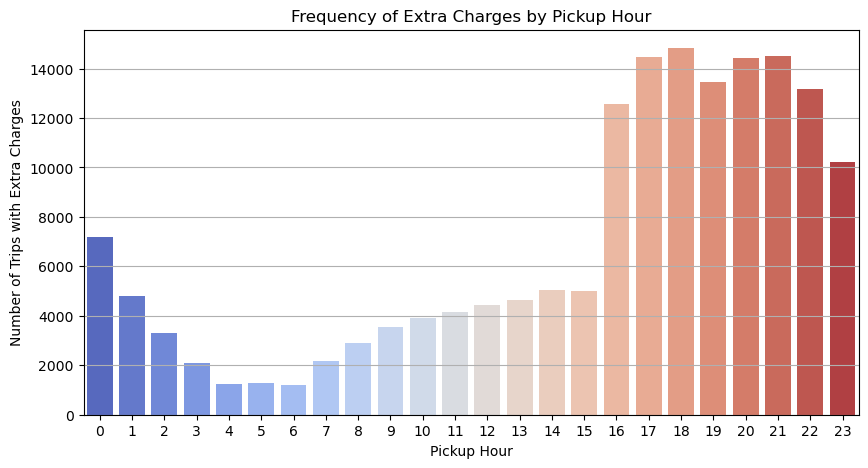

In [269]:
# Distribution of extra charges across pickup hours
extra_by_hour = trips_with_extra['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=extra_by_hour.index, y=extra_by_hour.values, palette='coolwarm')
plt.title('Frequency of Extra Charges by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips with Extra Charges')
plt.grid(axis='y')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Peak Hour Deployment (5 PM–8 PM): 
Evening hours consistently show a spike in trip volume, particularly in commercial and nightlife-heavy areas
Based on fleet planning principles, higher cab density during this period can reduce passenger wait time and improve revenue per hour
Real-time routing algorithms that account for traffic and congestion can significantly reduce wait time

Off-Peak Efficiency (2 AM–5 AM):
These hours show significantly lower demand, but not zero
Instead of full citywide coverage, focusing on moderately active zones such as JFK Airport and East Village may help reduce operating costs

Weekday vs Weekend Strategy:

--Fridays & Saturdays: 
--Notable increase in late-night activity likely tied to entertainment and nightlife. Taxis should be concentrated around hotspots like Times Square, West Village, and Chelsea
--Mondays & Tuesdays: 
--Lower demand can be addressed with minimal fleet presence and predictive dispatching to reduce idle mileage

Weather & Season-Aware Routing: 
Preliminary reading suggests taxi demand can rise near parks, shopping districts, and transit hubs during holidays and warm months
Adjusting routing strategies for events or seasonal surges (e.g., July 4th, December tourism) could improve pre-positioning accuracy

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
High-Demand Pickup/Drop-Off Zones:
From trip trend heatmaps:
Nighttime Pickups: East Village, JFK, West Village, Clinton East
Nighttime Drop-Offs: Times Square, Clinton East, Murray Hill

These zones could benefit from prioritized fleet placement — especially during evenings and weekends

Transit Hub Coverage: 
Frequent cab activity around Penn Station, JFK, and LaGuardia aligns with what is expected near major travel centers
Maintaining a steady cab presence in these zones may ensure higher trip frequency and reduced idle time for drivers

Dynamic Zone Rebalancing: 
Rather than fixed deployments, a flexible zone reassignment strategy such as shifting cabs from underperforming areas to heavy commuter zones may increase utilization.

Rotating Low Demand Coverage: 
To avoid overserving low-traffic zones, implement a rotational presence 
For example, a group of cabs can take turns covering the outer boroughs during early morning hours — maintaining coverage while reducing fuel costs

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Revenue Maximization Strategies:
1)Surge Pricing During High-Demand Periods: Introduce modest fare hikes during:
2)Peak hours (5–8 PM), weekends, and summer months.
3)Special event windows and holidays (for e.g., December travel spike).

Distance-Based Pricing Refinement:
Since trip distance correlates positively with fare and tips, implement tiered pricing where longer trips provide proportionally higher incentives to drivers, motivating coverage of distant zones.

Zone-Specific Adjustments:
Consider zone-specific base fares in high-traffic areas like airports and tourist centers. For example, East Village or JFK could have an surcharge during nights or weekends.
This aligns wiht what major ride-share services apply in "prime zones" i.e zones typically located near major transportation hubs

Incentivized Discounts: 
Incentivize trips during slow periods (like 2–5 AM or post-holiday weekdays) with discounts or app-based loyalty perks can stimulate demand and maintain minimal baseline revenue during quieter times.

Competetive Pricing:
Monitoring Uber/Lyft fare fluctuations in overlapping zones could help dynamically adjust NYC taxi rates to remain competitive
Even small adjustments may improve rider retention in price-sensitive zones

In [ ]:
Final Thoughts and Conclusion:
This report is based on EDA and limited domain exposure, the recommendations apply basic transport and fleet management principles
With deeper integration of traffic data, rider feedback, and real-time analytics, more advanced optimization strategies could be developed such as:

Predictive fleet modeling using demand forecasting

Reinforcement learning to optimize routing

Fare simulations based on elasticity modeling